# 가설 3: 코로나 이후 온라인 교육으로 인해 학생들의 학습 이해도가 떨어져서 사교육 비중이 증가했다?

- 활용 데이터 : 원격수업 여부․효과성 여부 및 비효율적인 이유 (주된응답, 18세 이하 인구)<br>
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSCV061R&vw_cd=MT_ZTITLE&list_id=B_7_D220&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

- 추가적으로 해야할 사항
1. 20~21년 학업성취도와 이전 학업성취도와의 비교(20년을 기준점으로 함) => pointplot
2. 기준년도, 물가, 사교육비와 학업성취도, 학업이탈 간의 상관관계 => heatmap
3. 온라인 교육이 학업 성취도에 악영향을 줬다는 확실한 근거 데이터 조사

=> EDA 결과, **성별로 나눠서 분석하는건 의미 없을 것 같다.**

## 로우 데이터 처리

- df_online : 성별로 조사항목 비율과 항목 응답의 총계

In [3]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as po

In [4]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [5]:
from glob import glob

glob("dataset/원격수업*.csv")

['dataset\\원격수업_여부․효과성_여부_및_비효율적인_이유__주된응답__18세_이하_인구__20221019104353.csv']

In [6]:
# 데이터 로드
raw = pd.read_csv("dataset\\원격수업_여부․효과성_여부_및_비효율적인_이유__주된응답__18세_이하_인구__20221019104353.csv", encoding="cp949")
raw.shape

(15, 18)

In [7]:
# 대분류 제거
col = raw.iloc[0,:].str.strip()
raw.columns = col
raw

,행정구역별(1),시점,항목,계,동부,읍면부,남자,여자,만족,보통,불만족,100만원 미만,100∼200만원 미만,200∼300만원 미만,300∼400만원 미만,400∼500만원 미만,500∼600만원 미만,600만원 이상
0,행정구역별(1),시점,항목,계,동부,읍면부,남자,여자,만족,보통,불만족,100만원 미만,100∼200만원 미만,200∼300만원 미만,300∼400만원 미만,400∼500만원 미만,500∼600만원 미만,600만원 이상
1,전국,2021,계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,전국,2021,원격수업함,92.0,91.9,92.6,93.3,90.5,92.7,91.7,90.3,83.2,87.7,90.2,92.0,93.0,94.8,92.8
3,전국,2021,- 원격수업 - 효과적이었음,39.3,40.3,33.8,41.9,36.5,44.7,33.7,33.9,23.9,39.4,33.0,39.4,38.6,40.8,43.9
4,전국,2021,- 원격수업 - 효과적이지 않았음,60.7,59.7,66.2,58.1,63.5,55.3,66.3,66.1,76.1,60.6,67.0,60.6,61.4,59.2,56.1
5,전국,2021,? 학교의 원격 수업 환경이 미비,20.9,20.7,21.9,21.8,19.9,22.5,21.2,15.4,14.3,24.8,19.1,24.6,18.0,23.0,19.8
6,전국,2021,? 나의 원격수업 환경이 미비,6.3,6.0,7.6,6.6,6.0,4.9,6.3,10.1,16.8,11.3,13.0,3.8,3.7,3.9,4.3
7,전국,2021,? 수업내용이나 구성이 미흡,19.0,19.2,17.8,20.7,17.2,16.0,23.2,17.6,12.3,14.8,20.7,13.8,20.6,22.4,20.5
8,전국,2021,"? 수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,5.6,8.0,6.0,5.9,8.1,4.5,3.3,11.9,6.8,2.6,9.6,6.1,7.8,3.3
9,전국,2021,"? 실험, 실습, 대면지도 등이 어려우므로",13.4,13.4,13.6,12.4,14.4,14.1,12.4,13.4,8.7,12.5,16.7,10.8,14.8,11.5,14.2


In [8]:
# 계, 중복행 제거
raw = raw.drop([0,1]).reset_index(drop=True)
raw

,행정구역별(1),시점,항목,계,동부,읍면부,남자,여자,만족,보통,불만족,100만원 미만,100∼200만원 미만,200∼300만원 미만,300∼400만원 미만,400∼500만원 미만,500∼600만원 미만,600만원 이상
0,전국,2021,원격수업함,92.0,91.9,92.6,93.3,90.5,92.7,91.7,90.3,83.2,87.7,90.2,92.0,93.0,94.8,92.8
1,전국,2021,- 원격수업 - 효과적이었음,39.3,40.3,33.8,41.9,36.5,44.7,33.7,33.9,23.9,39.4,33.0,39.4,38.6,40.8,43.9
2,전국,2021,- 원격수업 - 효과적이지 않았음,60.7,59.7,66.2,58.1,63.5,55.3,66.3,66.1,76.1,60.6,67.0,60.6,61.4,59.2,56.1
3,전국,2021,? 학교의 원격 수업 환경이 미비,20.9,20.7,21.9,21.8,19.9,22.5,21.2,15.4,14.3,24.8,19.1,24.6,18.0,23.0,19.8
4,전국,2021,? 나의 원격수업 환경이 미비,6.3,6.0,7.6,6.6,6.0,4.9,6.3,10.1,16.8,11.3,13.0,3.8,3.7,3.9,4.3
5,전국,2021,? 수업내용이나 구성이 미흡,19.0,19.2,17.8,20.7,17.2,16.0,23.2,17.6,12.3,14.8,20.7,13.8,20.6,22.4,20.5
6,전국,2021,"? 수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,5.6,8.0,6.0,5.9,8.1,4.5,3.3,11.9,6.8,2.6,9.6,6.1,7.8,3.3
7,전국,2021,"? 실험, 실습, 대면지도 등이 어려우므로",13.4,13.4,13.6,12.4,14.4,14.1,12.4,13.4,8.7,12.5,16.7,10.8,14.8,11.5,14.2
8,전국,2021,? 선생님의 지도 없이 학습하기 어려우므로,9.5,9.1,11.7,10.3,8.7,7.9,11.2,10.2,7.4,9.4,8.7,10.2,12.7,11.6,6.3
9,전국,2021,? 학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로,18.2,18.8,15.3,15.4,21.0,20.4,14.8,19.8,26.7,13.5,12.3,22.7,16.3,15.7,21.5


In [9]:
# "항목" 칼럼에서 필요없는 문자열 및 좌우 공백 제거
raw["항목"] = raw["항목"].str.replace("[-?]", "", regex=True).str.strip()
raw

,행정구역별(1),시점,항목,계,동부,읍면부,남자,여자,만족,보통,불만족,100만원 미만,100∼200만원 미만,200∼300만원 미만,300∼400만원 미만,400∼500만원 미만,500∼600만원 미만,600만원 이상
0,전국,2021,원격수업함,92.0,91.9,92.6,93.3,90.5,92.7,91.7,90.3,83.2,87.7,90.2,92.0,93.0,94.8,92.8
1,전국,2021,원격수업 효과적이었음,39.3,40.3,33.8,41.9,36.5,44.7,33.7,33.9,23.9,39.4,33.0,39.4,38.6,40.8,43.9
2,전국,2021,원격수업 효과적이지 않았음,60.7,59.7,66.2,58.1,63.5,55.3,66.3,66.1,76.1,60.6,67.0,60.6,61.4,59.2,56.1
3,전국,2021,학교의 원격 수업 환경이 미비,20.9,20.7,21.9,21.8,19.9,22.5,21.2,15.4,14.3,24.8,19.1,24.6,18.0,23.0,19.8
4,전국,2021,나의 원격수업 환경이 미비,6.3,6.0,7.6,6.6,6.0,4.9,6.3,10.1,16.8,11.3,13.0,3.8,3.7,3.9,4.3
5,전국,2021,수업내용이나 구성이 미흡,19.0,19.2,17.8,20.7,17.2,16.0,23.2,17.6,12.3,14.8,20.7,13.8,20.6,22.4,20.5
6,전국,2021,"수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,5.6,8.0,6.0,5.9,8.1,4.5,3.3,11.9,6.8,2.6,9.6,6.1,7.8,3.3
7,전국,2021,"실험, 실습, 대면지도 등이 어려우므로",13.4,13.4,13.6,12.4,14.4,14.1,12.4,13.4,8.7,12.5,16.7,10.8,14.8,11.5,14.2
8,전국,2021,선생님의 지도 없이 학습하기 어려우므로,9.5,9.1,11.7,10.3,8.7,7.9,11.2,10.2,7.4,9.4,8.7,10.2,12.7,11.6,6.3
9,전국,2021,학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로,18.2,18.8,15.3,15.4,21.0,20.4,14.8,19.8,26.7,13.5,12.3,22.7,16.3,15.7,21.5


In [10]:
col

행정구역별(1)         행정구역별(1)
시점                     시점
항목                     항목
전체                      계
동·읍면부                  동부
동·읍면부.1               읍면부
성별                     남자
성별.1                   여자
주관적 만족감                만족
주관적 만족감.1              보통
주관적 만족감.2             불만족
가구소득             100만원 미만
가구소득.1       100∼200만원 미만
가구소득.2       200∼300만원 미만
가구소득.3       300∼400만원 미만
가구소득.4       400∼500만원 미만
가구소득.5       500∼600만원 미만
가구소득.6           600만원 이상
Name: 0, dtype: object

In [11]:
# 필요한 칼럼만 행으로 melt
df_online = pd.melt(raw, id_vars=["항목","계"], value_vars=col[6:8], var_name="성별", value_name="비율")
df_online

,항목,계,성별,비율
0,원격수업함,92.0,남자,93.3
1,원격수업 효과적이었음,39.3,남자,41.9
2,원격수업 효과적이지 않았음,60.7,남자,58.1
3,학교의 원격 수업 환경이 미비,20.9,남자,21.8
4,나의 원격수업 환경이 미비,6.3,남자,6.6
5,수업내용이나 구성이 미흡,19.0,남자,20.7
6,"수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,남자,6.0
7,"실험, 실습, 대면지도 등이 어려우므로",13.4,남자,12.4
8,선생님의 지도 없이 학습하기 어려우므로,9.5,남자,10.3
9,학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로,18.2,남자,15.4


In [12]:
# numeric 형변환
df_online["계"] = pd.to_numeric(df_online["계"], errors="coerce")
df_online["비율"] = pd.to_numeric(df_online["비율"], errors="coerce")
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   항목      26 non-null     object 
 1   계       24 non-null     float64
 2   성별      26 non-null     object 
 3   비율      24 non-null     float64
dtypes: float64(2), object(2)
memory usage: 960.0+ bytes


## 온라인 학습 경험 비율
- 2021년 초,중,고등학생 온라인 학습 경험이 92%로 나타남
- 해당 시기의 학업성취도에 영향을 미쳤다고 가정할 수 있음 ?
<br><br>
- df_online_per : df_online에서 가공. 전체 온라인 학습 경험 비율

In [13]:
# 시각화를 위해 필요한 항목만 가져오기
df_online_per = df_online.loc[df_online["항목"].str.contains("원격수업함|원격수업 안함"), ["항목", "계"]]
df_online_per = df_online_per[df_online_per.duplicated()]
df_online_per

,항목,계
13,원격수업함,92.0
25,원격수업 안함,8.0


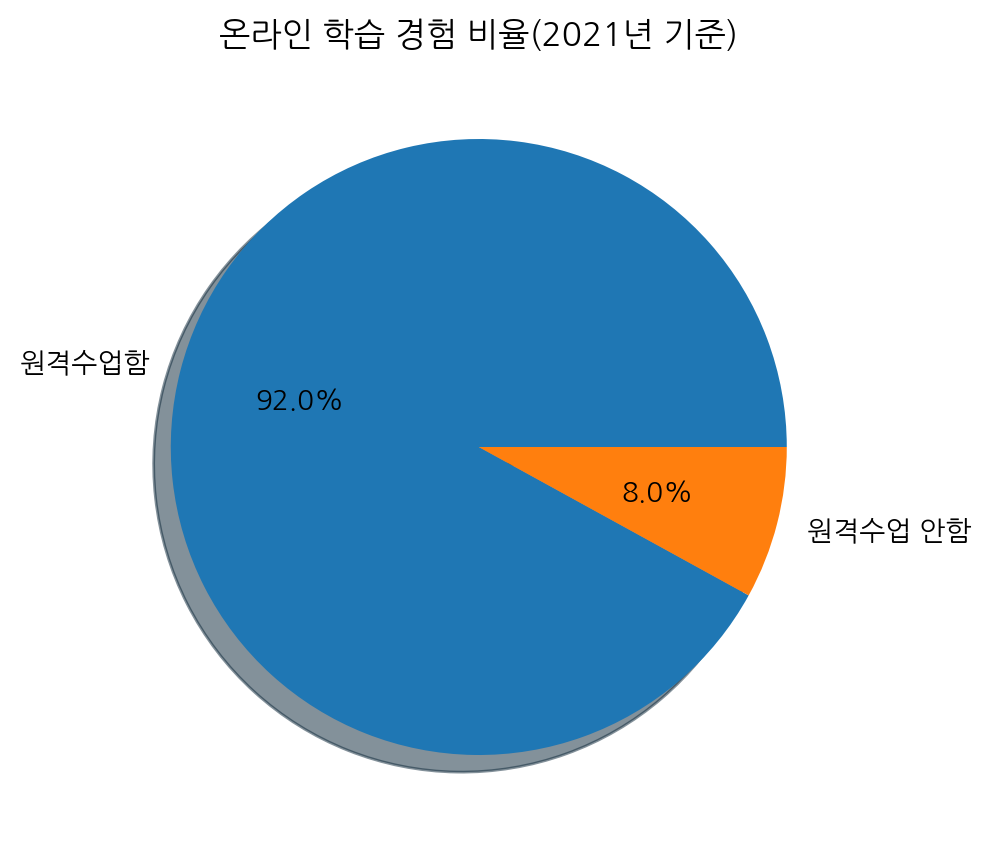

In [14]:
# 파이차트 생성
plt.figure(figsize=(18,5))
plt.pie(df_online_per["계"]
       , labels=df_online_per["항목"]
       , autopct= "%.1f%%"
       , shadow=True)
plt.title("온라인 학습 경험 비율(2021년 기준)")
plt.show()

In [ ]:
px.pie(df_online_per, values="계", names="항목", title="온라인 학습 경험 비율(2021년 기준)")

## 온라인 교육의 효과성 판단 여부(전체, 성별)
- 온라인 교육이 효과적이지 않다고 생각하는 학생이 전체 60.7%
<br><br>
- df_effect : df_online에서 가공함. 성별 원격수업 효과성 판단 여부 항목 및 비율

In [15]:
# 시각화를 위해 필요한 항목만 가져오기
df_effect = df_online[df_online["항목"].str.contains("원격수업  효과적이었음|원격수업  효과적이지 않았음")]
df_effect

,항목,계,성별,비율
1,원격수업 효과적이었음,39.3,남자,41.9
2,원격수업 효과적이지 않았음,60.7,남자,58.1
14,원격수업 효과적이었음,39.3,여자,36.5
15,원격수업 효과적이지 않았음,60.7,여자,63.5


C:\Users\JongHyun_Moon\AppData\Local\Temp\ipykernel_13972\938685133.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ef_p_a = sns.barplot(data=df_effect[df_effect[["항목","계"]].duplicated()], x="항목", y="계"


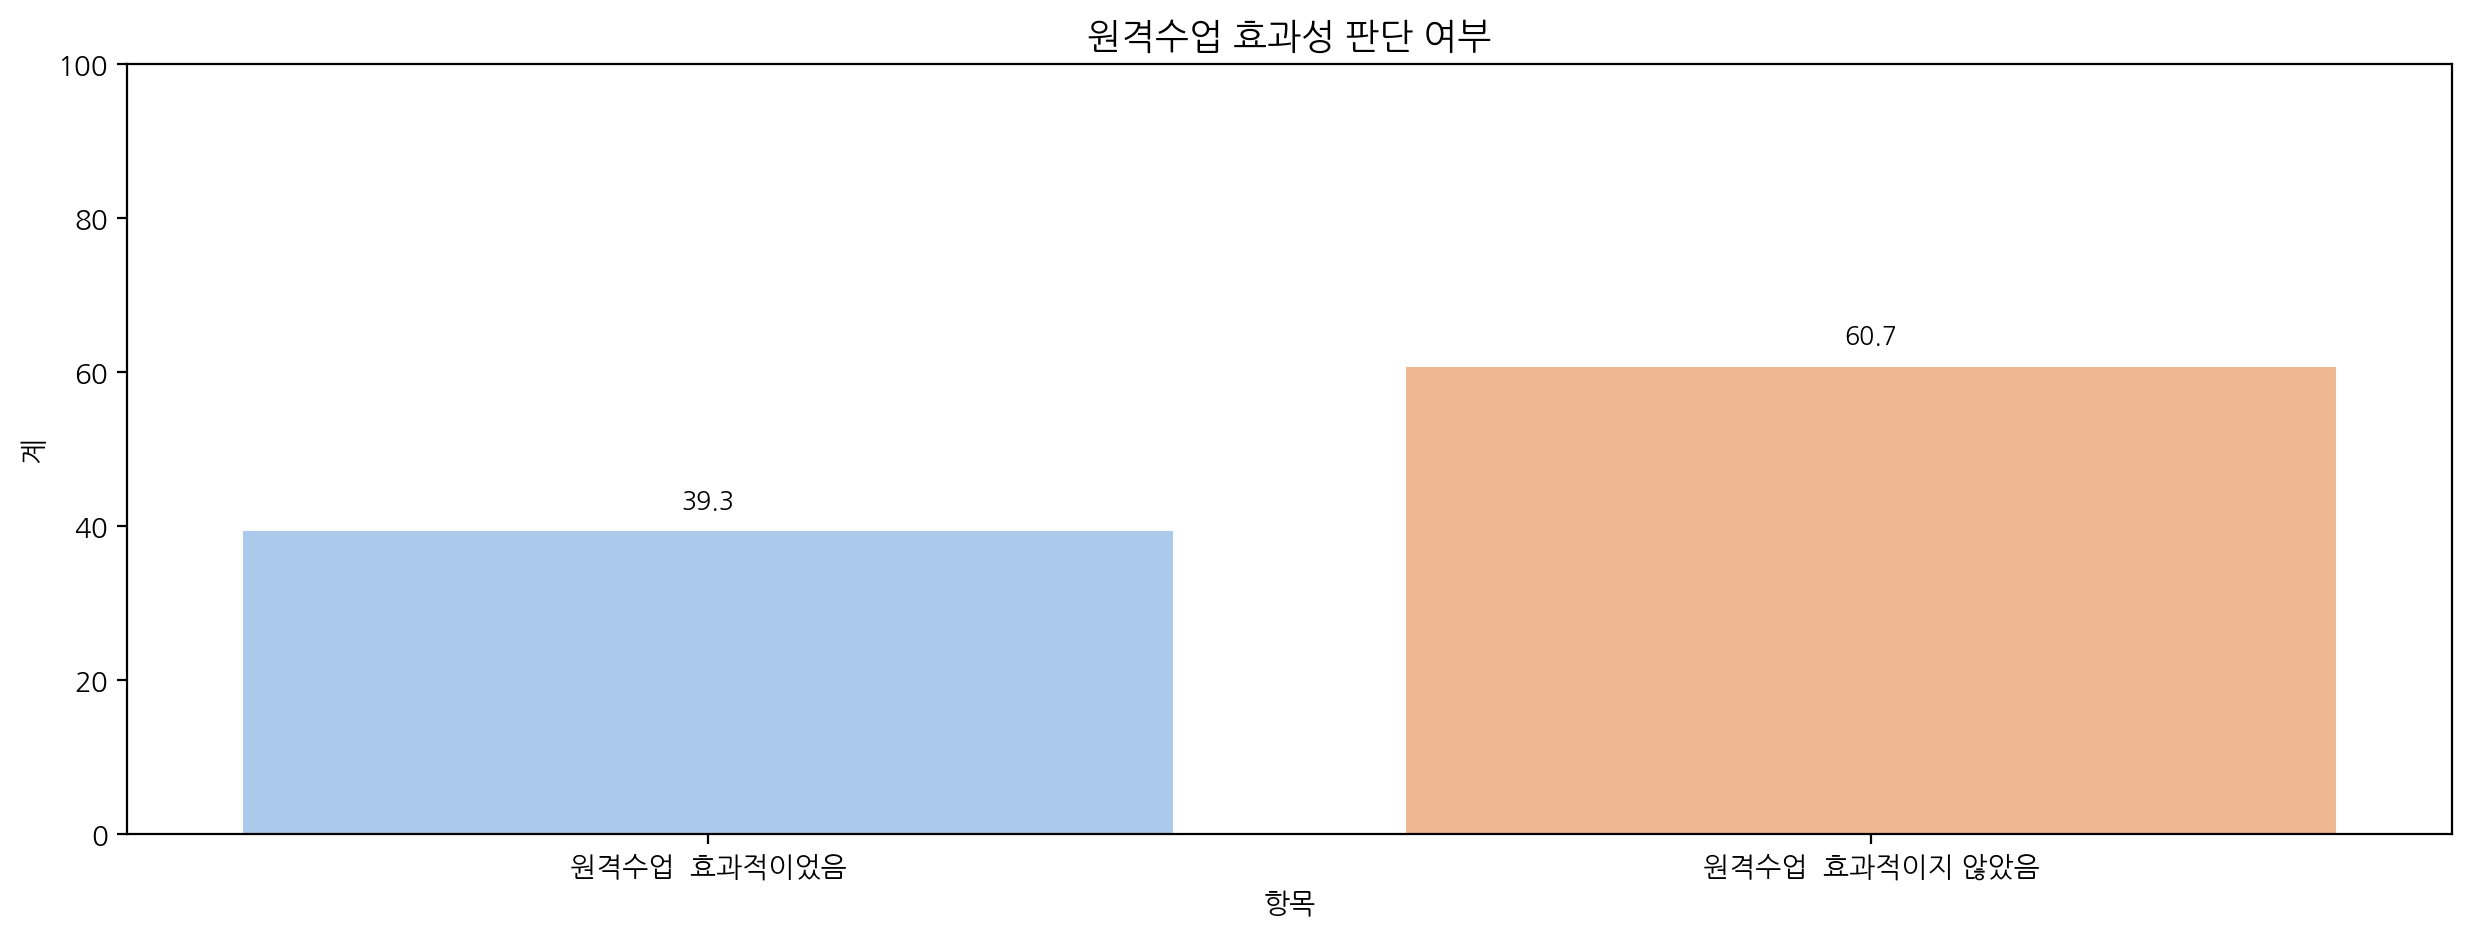

In [16]:
# 원격수업 효과성 판단 여부 시각화
plt.figure(figsize=(15,5))
ef_p_a = sns.barplot(data=df_effect[df_effect[["항목","계"]].duplicated()], x="항목", y="계"
                   , palette = sns.color_palette("pastel"), ci=None)

for p in ef_p_a.patches:
    height = p.get_height()
    ef_p_a.text(p.get_x() + p.get_width() / 2, height + 3, height, ha = 'center', size = 9)

ef_p_a.set_ylim(0, 100)
ef_p_a.set_title("원격수업 효과성 판단 여부", size=13)
plt.show()

C:\Users\JongHyun_Moon\AppData\Local\Temp\ipykernel_13972\1209545648.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ef_p = sns.barplot(data=df_effect, x="항목", y="비율", hue="성별"


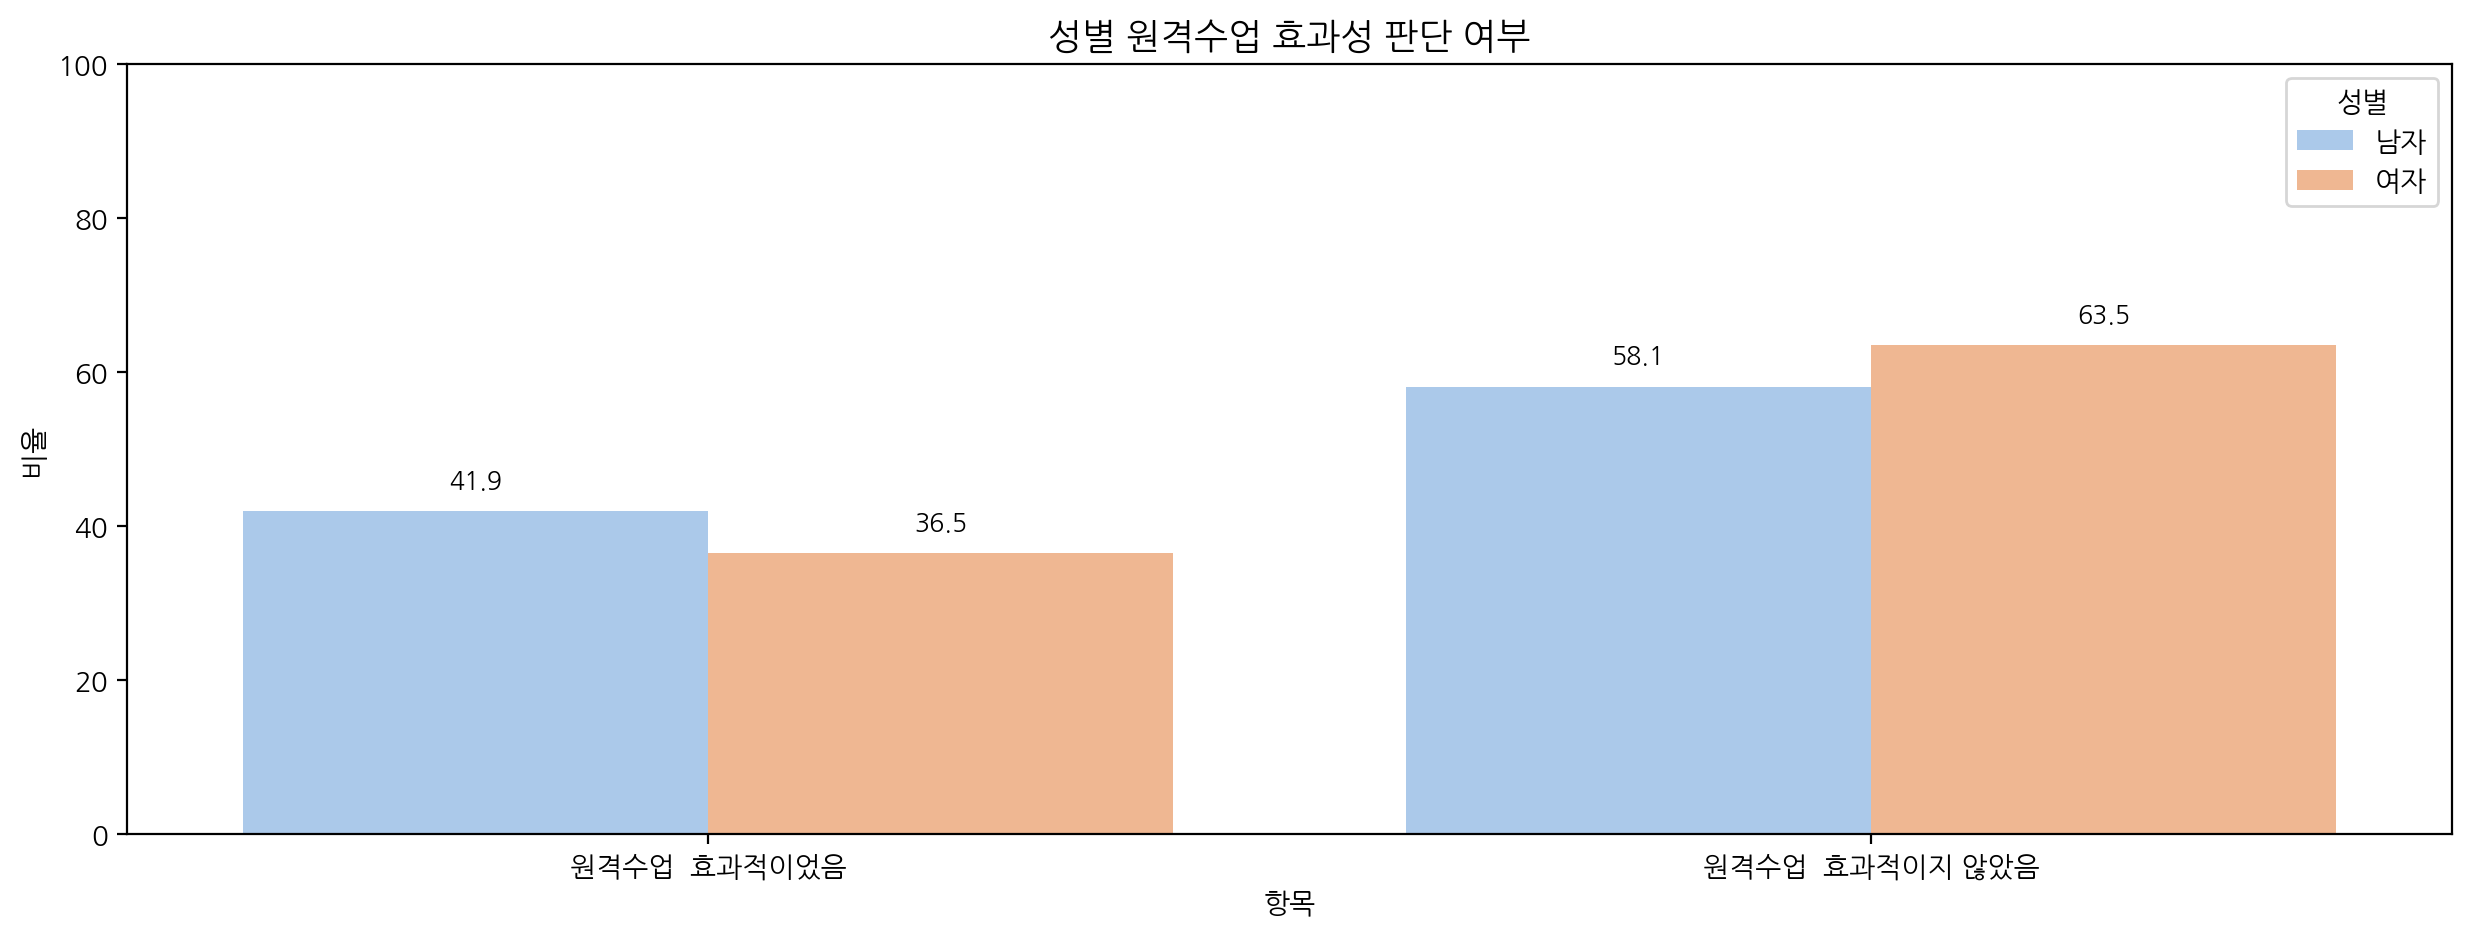

In [17]:
# 성별로 나누어 시각화
plt.figure(figsize=(15,5))
ef_p = sns.barplot(data=df_effect, x="항목", y="비율", hue="성별"
                   , palette = sns.color_palette("pastel"), ci=None)

for p in ef_p.patches:
    height = p.get_height()
    ef_p.text(p.get_x() + p.get_width() / 2, height + 3, height, ha = 'center', size = 9)
ef_p.set_ylim(0, 100)
ef_p.set_title("성별 원격수업 효과성 판단 여부", size=13)
plt.show()

- 성별로 나누었을 때 특별히 인사이트가 나타나는 부분은 없음

## 원격수업이 비효율적인 이유(전체, 성별)
- 1위 : 학교 온라인 수업 인프라 문제
- 2위 : 수업 자체의 질 문제
- 3위 : 수업에 집중하기 어려움
<br><br>
- df_reason : df_online에서 가공. 원격수업이 효과적이지 않은 이유 항목 및 비율

In [18]:
# 시각화를 위해 필요한 항목만 가져오기
df_reason = df_online[~df_online["항목"].str.contains("원격수업함|원격수업  효과적이었음|원격수업  효과적이지 않았음|기타|원격수업 안함")]
df_reason

,항목,계,성별,비율
3,학교의 원격 수업 환경이 미비,20.9,남자,21.8
4,나의 원격수업 환경이 미비,6.3,남자,6.6
5,수업내용이나 구성이 미흡,19.0,남자,20.7
6,"수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,남자,6.0
7,"실험, 실습, 대면지도 등이 어려우므로",13.4,남자,12.4
8,선생님의 지도 없이 학습하기 어려우므로,9.5,남자,10.3
9,학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로,18.2,남자,15.4
10,선생님이나 학우들과의 소통이 어려우므로,6.8,남자,6.8
16,학교의 원격 수업 환경이 미비,20.9,여자,19.9
17,나의 원격수업 환경이 미비,6.3,여자,6.0


C:\Users\JongHyun_Moon\AppData\Local\Temp\ipykernel_13972\3535092057.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  rs_p_a = sns.barplot(data=df_reason.sort_values(by="계",ascending=False), y="항목", x="계"


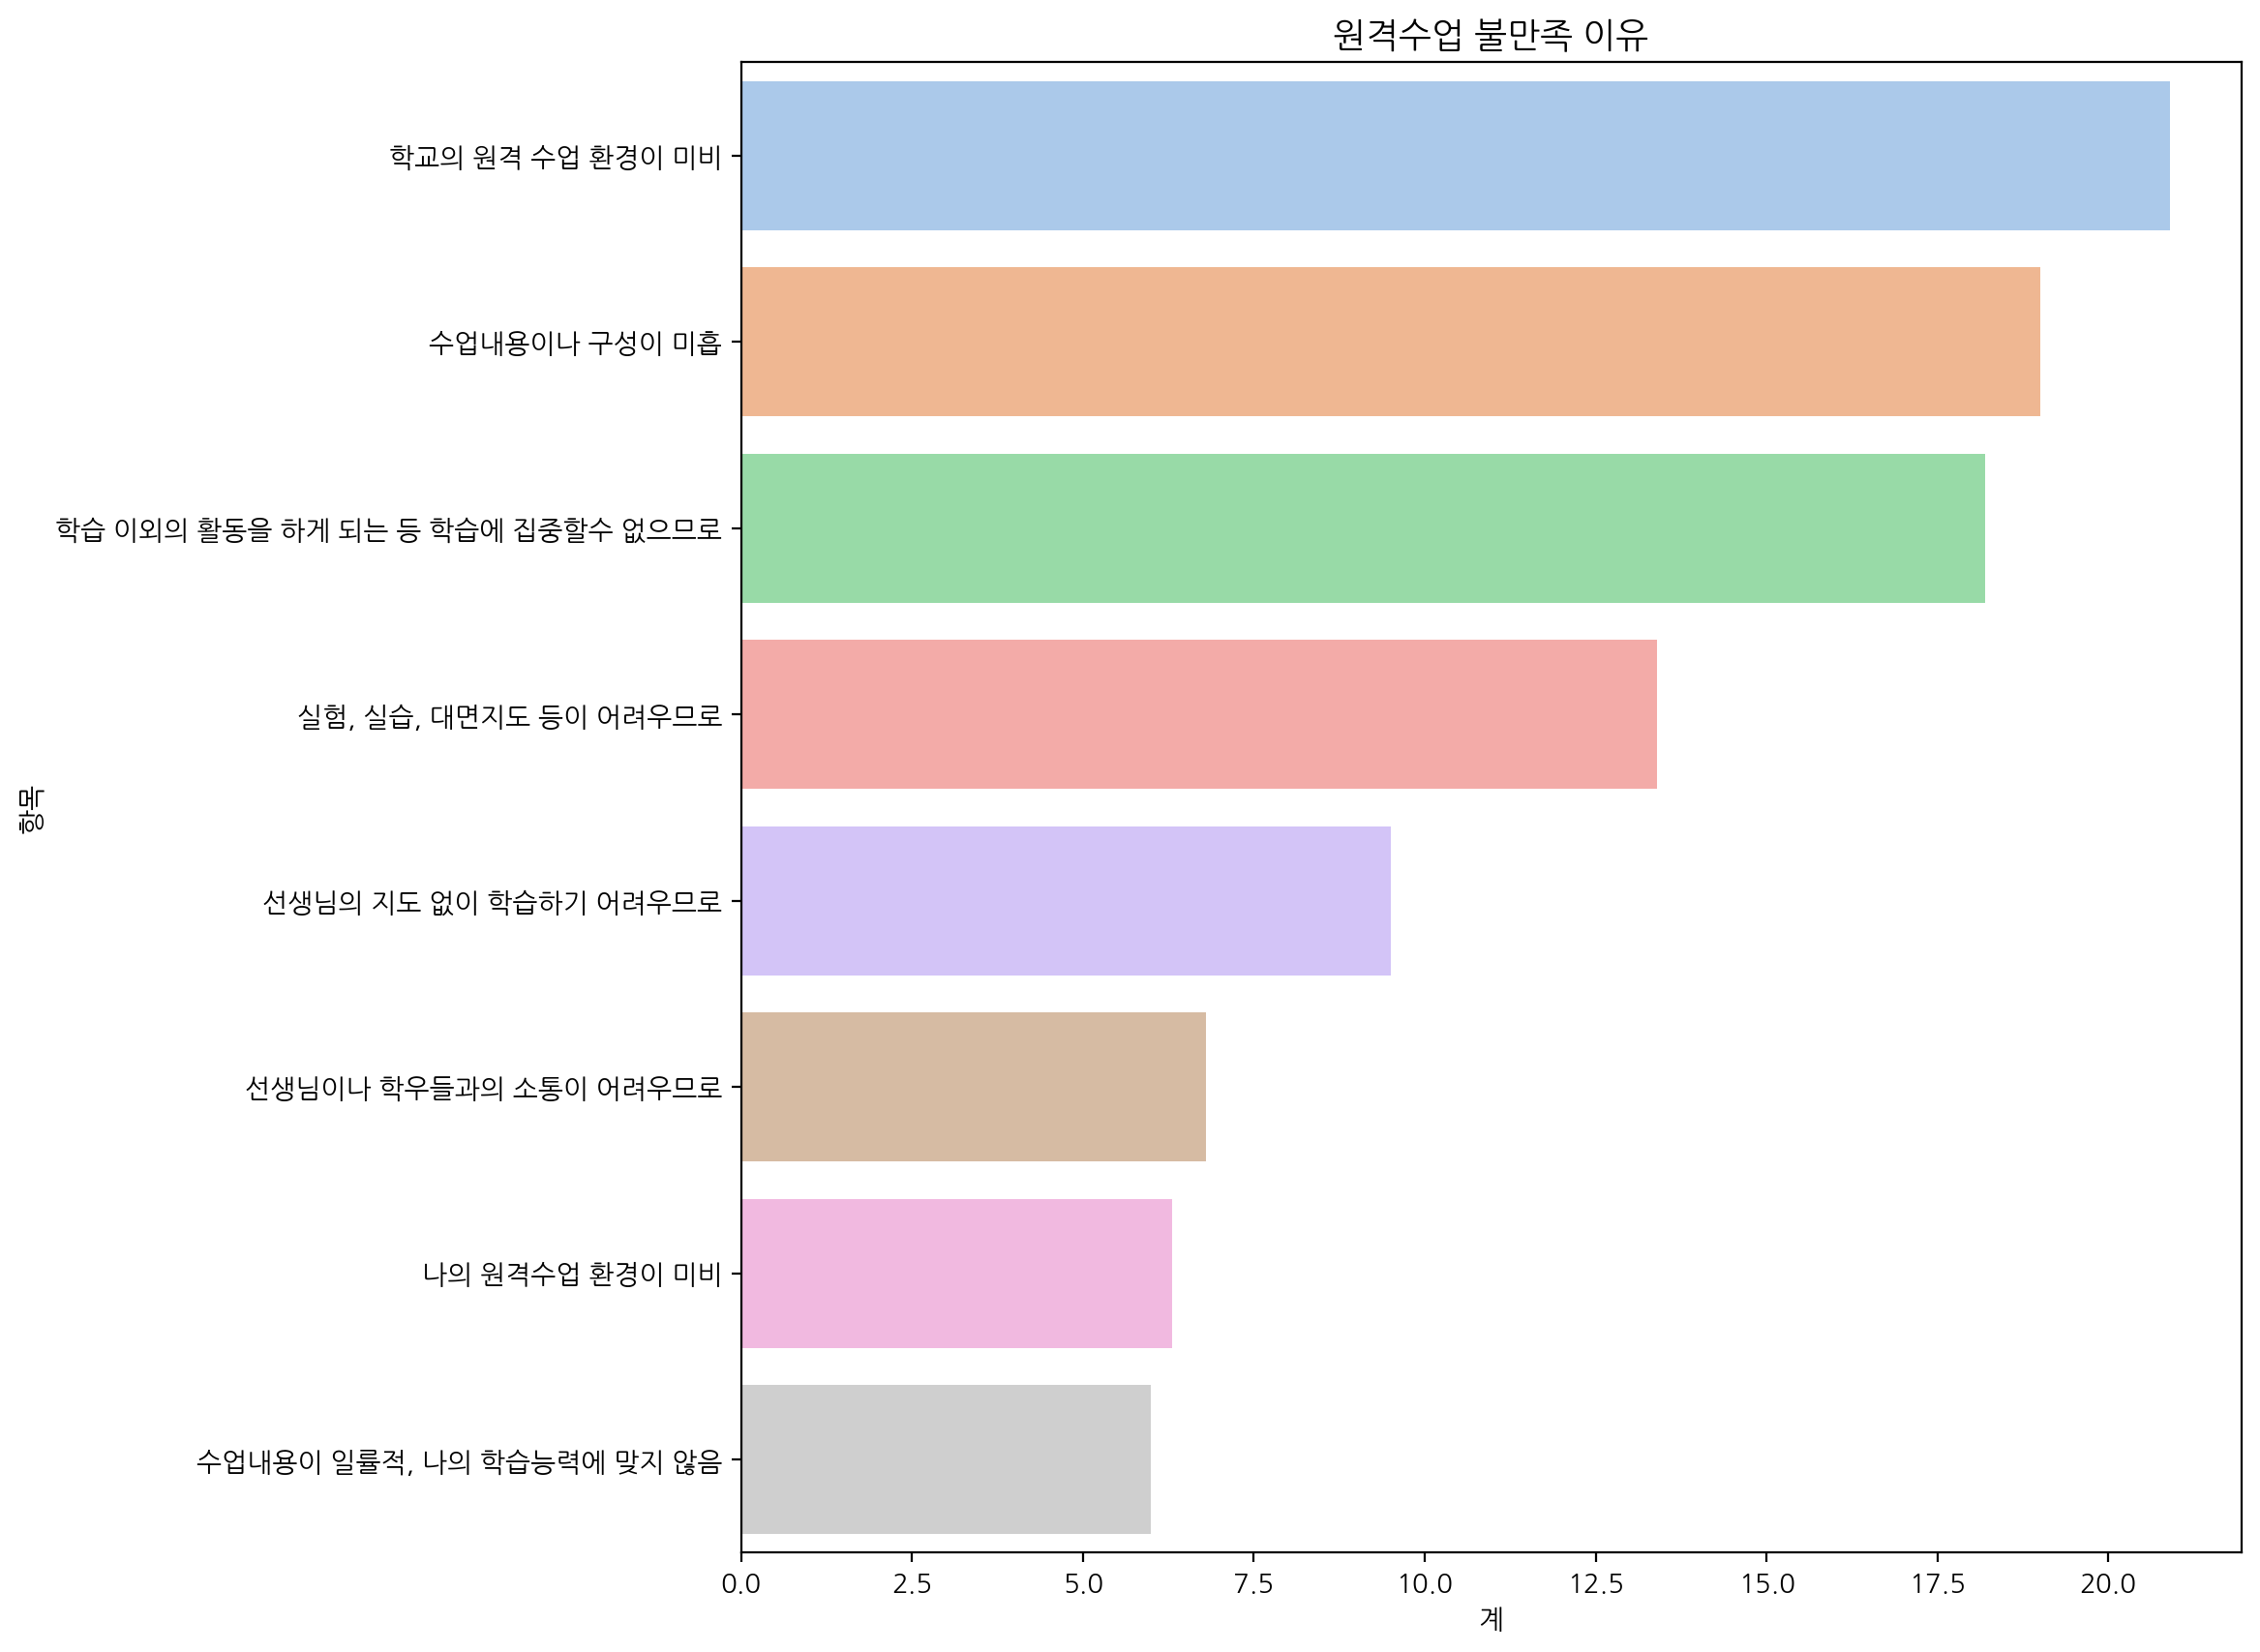

In [19]:
# 온라인 수업 불만족 이유 시각화
plt.figure(figsize=(10,10))
rs_p_a = sns.barplot(data=df_reason.sort_values(by="계",ascending=False), y="항목", x="계"
                   , palette = sns.color_palette("pastel"), ci=None)

rs_p_a.set_title("원격수업 불만족 이유", size=13)
plt.show()

C:\Users\JongHyun_Moon\AppData\Local\Temp\ipykernel_13972\1112709045.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  rs_p = sns.barplot(data=df_reason, y="항목", x="비율", hue="성별"


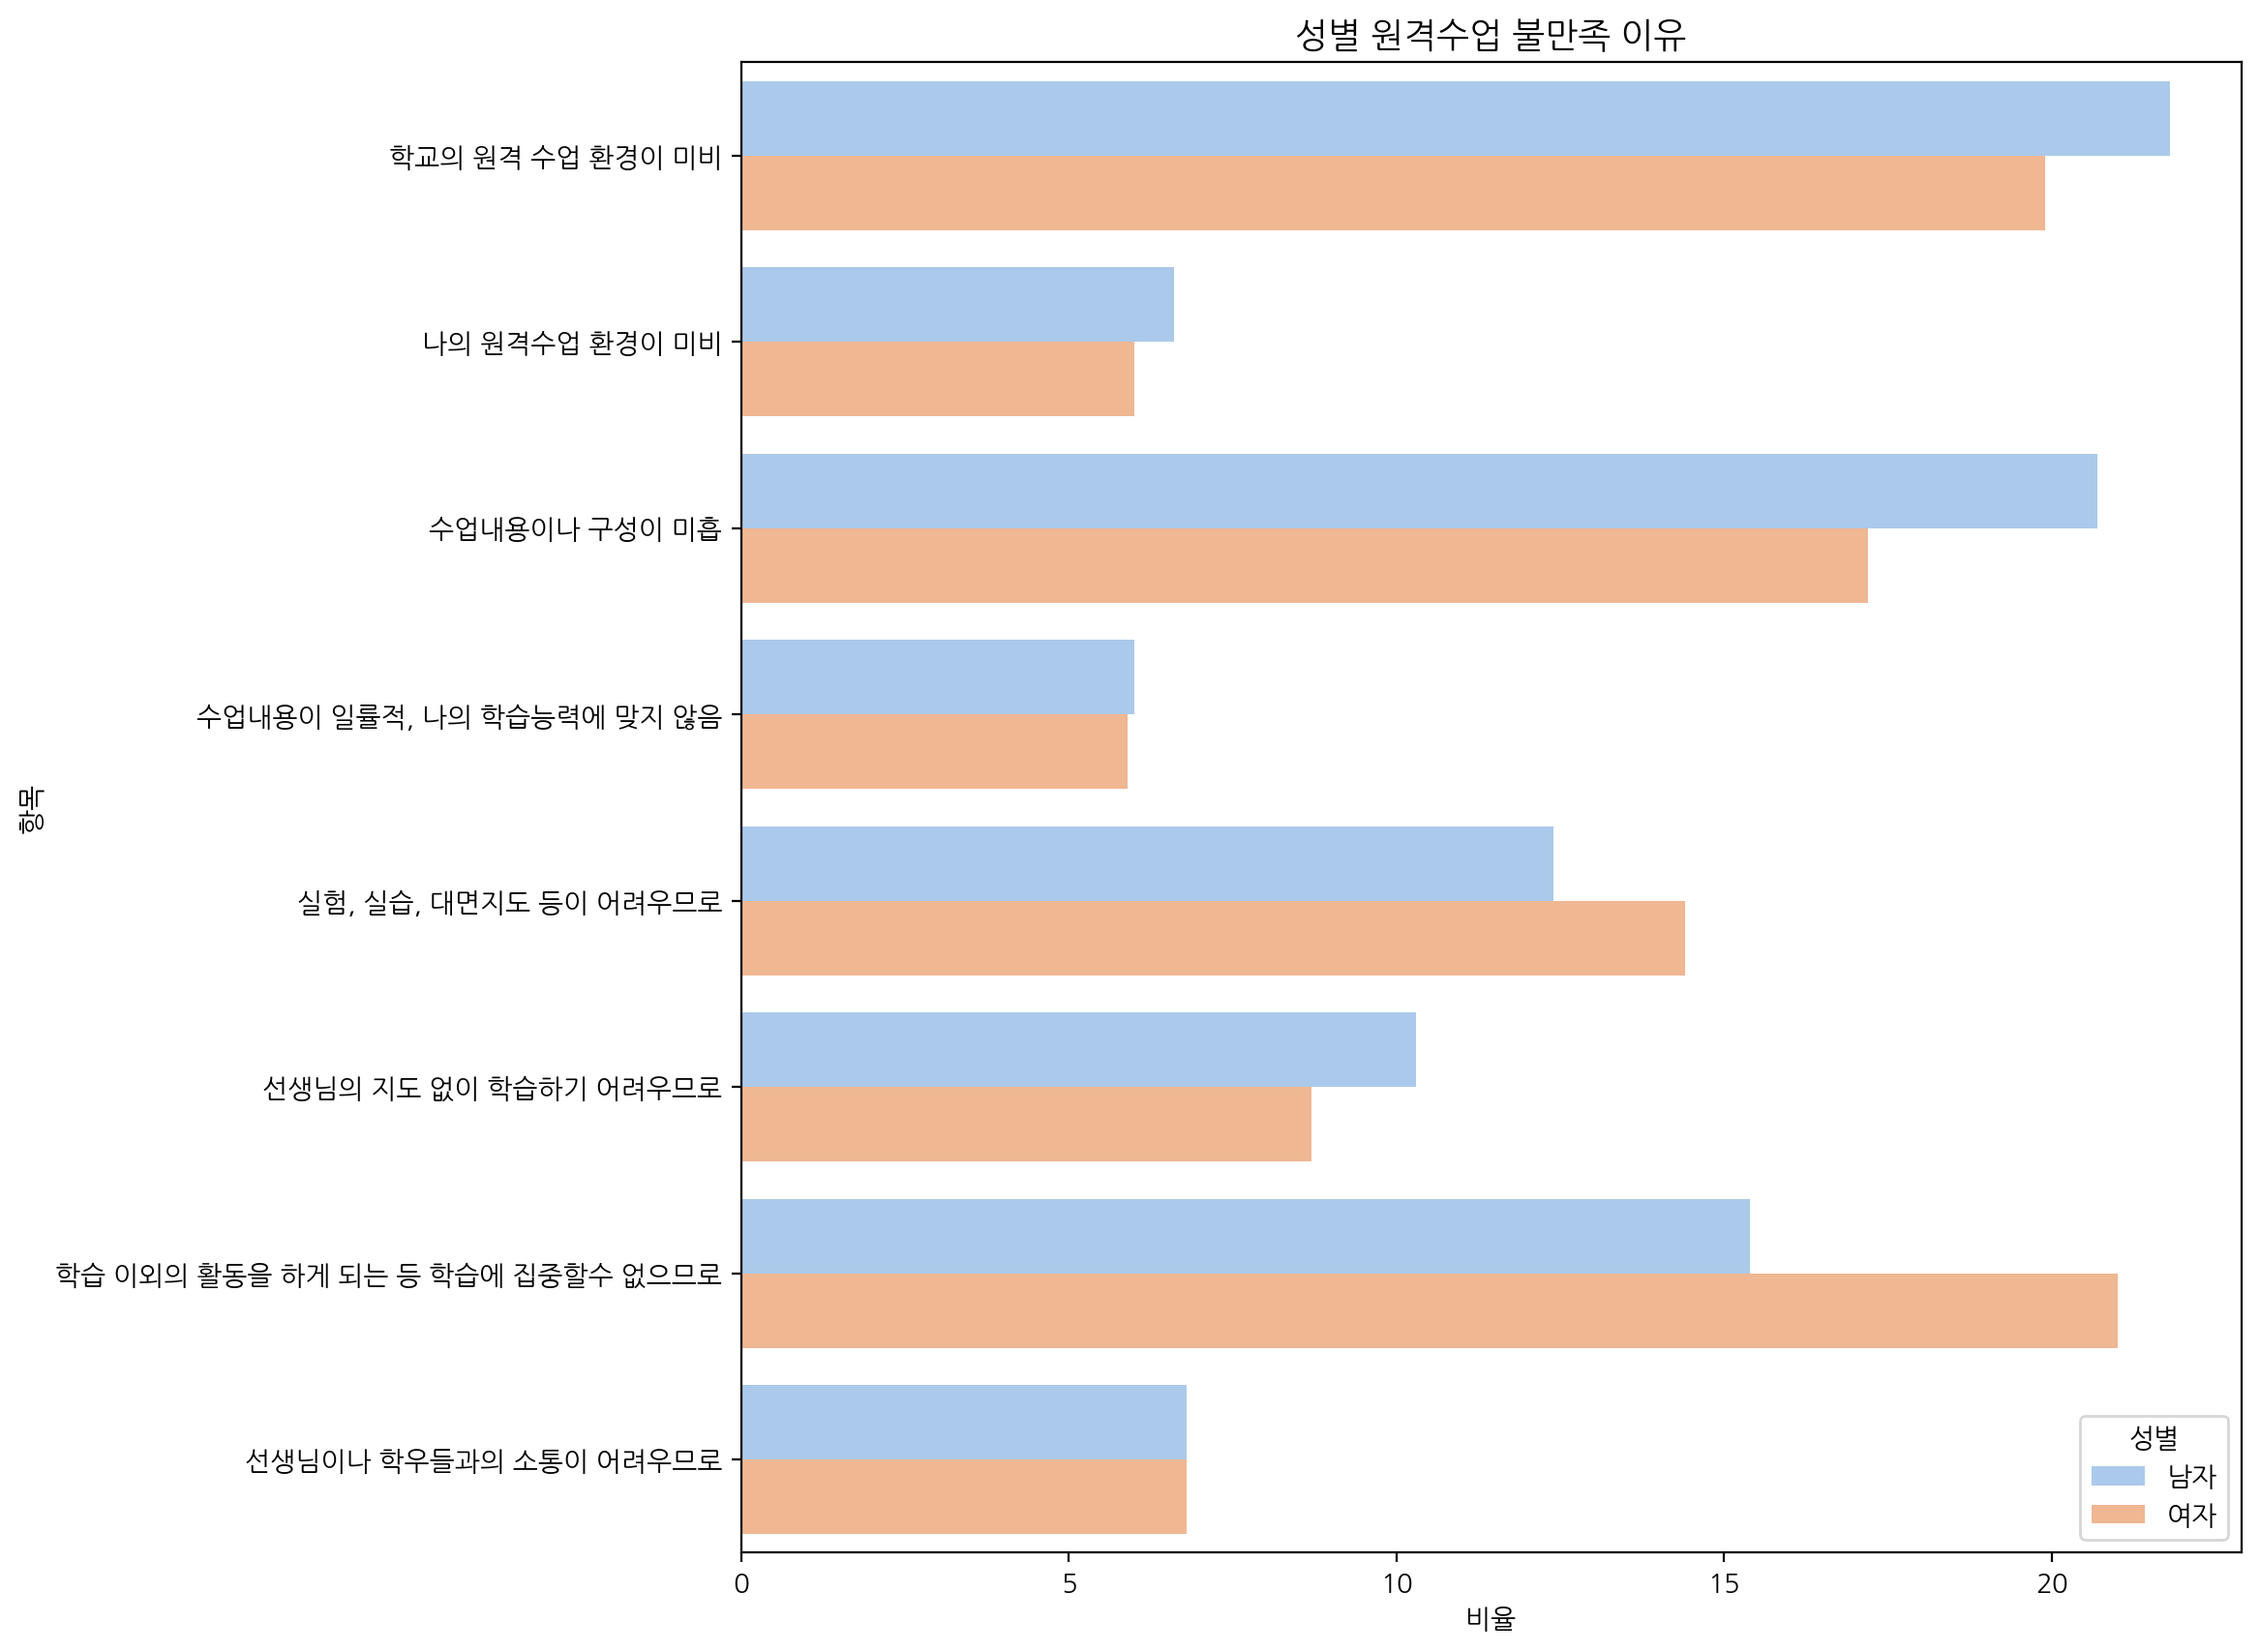

In [20]:
# 성별로 나누어 시각화
plt.figure(figsize=(10,10))
rs_p = sns.barplot(data=df_reason, y="항목", x="비율", hue="성별"
                   , palette = sns.color_palette("pastel"), ci=None)

rs_p.set_title("성별 원격수업 불만족 이유", size=13)
plt.show()

- 여성보다는 남성이 수업 "환경", "인프라"에 더 신경씀

# 사교육비 데이터

## 데이터 처리

- df_region_school_year_sum : 가설1번의 데이터셋. 지역 - 학교급에 따른 연간 사교육비 총액
- df_region_sum : 가설1번의 데이터셋. 지역별 사교육비 총액
- df_private : 전국 사교육비 총액
- df_cpi : 연도별 학원 및 보습교육 항목의 소비자물가지수

In [21]:
df_region_school_year_sum = pd.read_csv('dataset\\학교급별_사교육비_총액_20221019112918.csv', encoding='cp949')

In [22]:
df_cpi = pd.read_csv('dataset\\소비자물가지수_20110545.csv', encoding='utf-8')

In [23]:
# 로우 데이터 처리
# 연도를 행으로 melt, 항목에서 필요없는 문자 제거, 총액,연도 칼럼 numeric 변경
df_region_school_year_sum  = pd.melt(df_region_school_year_sum , id_vars = ['항목','특성별'], var_name='연도',value_name='총액')
df_region_school_year_sum['항목'] = df_region_school_year_sum['항목'].str.replace(' \(\억\원\)','',regex=True)
df_region_school_year_sum["총액"] = pd.to_numeric(df_region_school_year_sum["총액"], errors="coerce")
df_region_school_year_sum

,항목,특성별,연도,총액
0,초등학교,서울,2011,19544.0
1,초등학교,광역시,2011,19294.0
2,초등학교,중소도시,2011,39522.0
3,초등학교,읍면지역,2011,12101.0
4,초등학교,국어,2011,6337.0
...,...,...,...,...
655,일반고,"제2외국어, 한문 등",2021,319.0
656,일반고,음악,2021,2056.0
657,일반고,미술,2021,3026.0
658,일반고,체육,2021,1434.0


In [24]:
# 특성별 컬럼은 지역과 과목이 함께 들어가있어서 지역만 분리
city = ['서울','광역시','중소도시','읍면지역']
df_region_sum = df_region_school_year_sum[df_region_school_year_sum['특성별'].isin(city)]
df_region_sum

,항목,특성별,연도,총액
0,초등학교,서울,2011,19544.0
1,초등학교,광역시,2011,19294.0
2,초등학교,중소도시,2011,39522.0
3,초등학교,읍면지역,2011,12101.0
15,중학교,서울,2011,12614.0
...,...,...,...,...
633,고등학교,읍면지역,2021,5945.0
645,일반고,서울,2021,15797.0
646,일반고,광역시,2021,13999.0
647,일반고,중소도시,2021,27206.0


In [25]:
# 지역합 = 전국통계로 가정하고 groupby
df_private = df_region_sum.groupby("연도").sum().reset_index()
df_private

,연도,총액
0,2011,248908.0
1,2012,239477.0
2,2013,235005.0
3,2014,231054.0
4,2015,227058.0
5,2016,233238.0
6,2017,241513.0
7,2018,252031.0
8,2019,269353.0
9,2020,254267.0


In [26]:
# merge를 위해 df_cpi를 df_private와 같은 형태로 변환
df_cpi = df_cpi.drop(0)
df_cpi.columns = ["연도", "지수", "전년대비증감", "전년대비증감률"]
df_cpi["연도"] = df_cpi["연도"].astype(str)
df_cpi

,연도,지수,전년대비증감,전년대비증감률
1,2011,80.761,2.574,3.3
2,2012,84.319,3.558,4.4
3,2013,87.454,3.135,3.7
4,2014,89.385,1.931,2.2
5,2015,91.235,1.850,2.1
6,2016,93.285,2.050,2.2
7,2017,94.740,1.455,1.6
8,2018,96.612,1.872,2.0
9,2019,98.505,1.893,2.0
10,2020,100.000,1.495,1.5


## 사교육비 총액 + 학원 및 보습교육 항목의 소비자물가지수

In [27]:
# 사교육비 총액 + 학원 및 보습교육 항목의 소비자물가지수
df_private_cpi = df_private.merge(df_cpi)
df_private_cpi

,연도,총액,지수,전년대비증감,전년대비증감률
0,2011,248908.0,80.761,2.574,3.3
1,2012,239477.0,84.319,3.558,4.4
2,2013,235005.0,87.454,3.135,3.7
3,2014,231054.0,89.385,1.931,2.2
4,2015,227058.0,91.235,1.850,2.1
5,2016,233238.0,93.285,2.050,2.2
6,2017,241513.0,94.740,1.455,1.6
7,2018,252031.0,96.612,1.872,2.0
8,2019,269353.0,98.505,1.893,2.0
9,2020,254267.0,100.000,1.495,1.5


## 연도별 사교육비 총액 & 학원 및 보습교육 물가지수 변동 시각화
- 물가가 사교육비에 영향을 미치지 못한 것으로 판단함

In [28]:
# seaborn 그래프 색상 커스터마이징. 사용한 그래프들의 한계로 사용하지 못함
# custom_palette = sns.choose_colorbrewer_palette("diversing")

C:\Users\JongHyun_Moon\AppData\Local\Temp\ipykernel_13972\256687791.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pr_p = sns.lineplot(data=df_private_cpi, x="연도", y="총액", palette="Blue", legend=False)


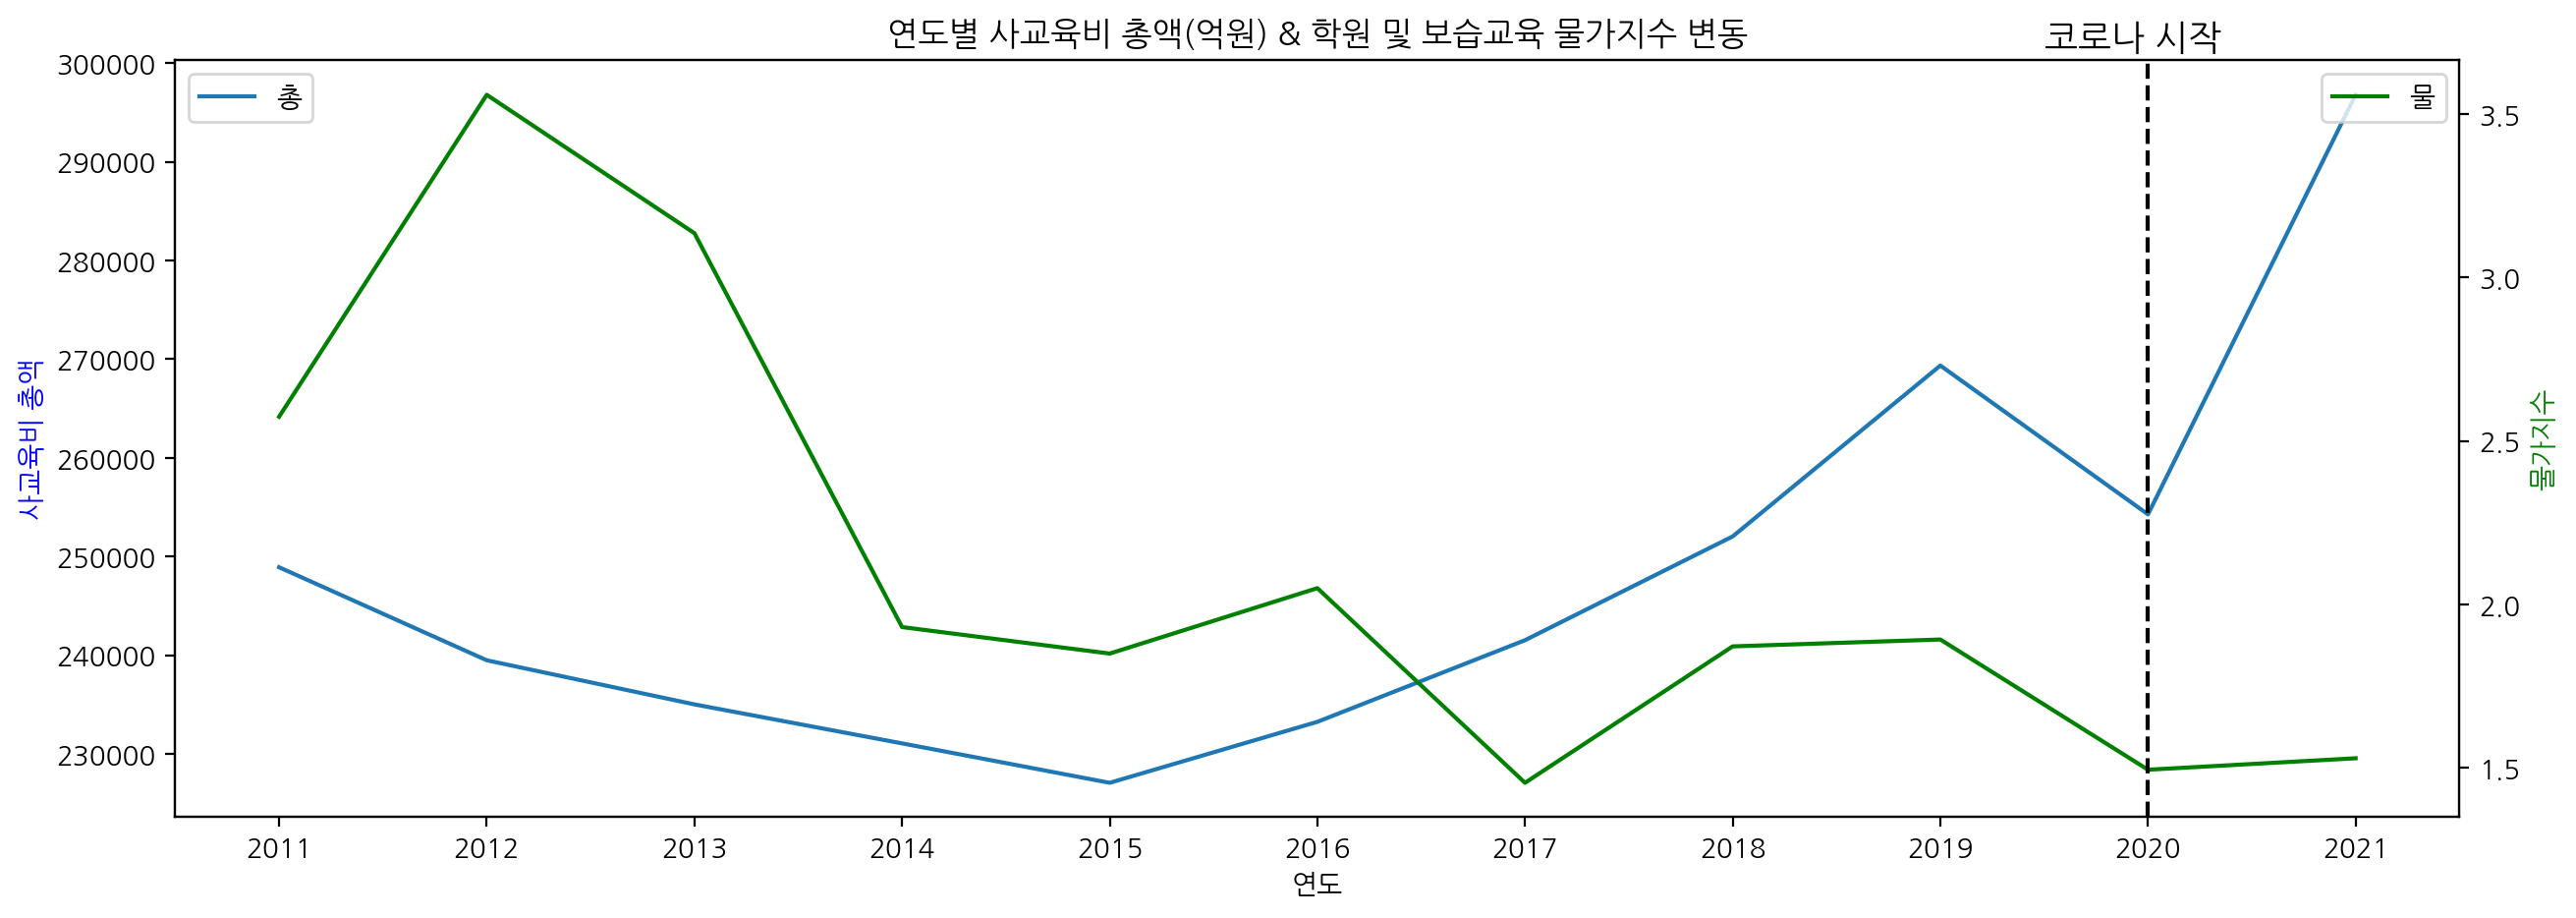

In [29]:
# 시각화
plt.figure(figsize=(15,5))

pr_p = sns.lineplot(data=df_private_cpi, x="연도", y="총액", palette="Blue", legend=False)

pr_c = pr_p.twinx()
pr_c = sns.lineplot(data=df_private_cpi, x="연도", y="전년대비증감", color="green", legend=False)

pr_p.set_ylabel("사교육비 총액", color="Blue")
pr_c.set_ylabel("물가지수", color="Green")

pr_p.legend("총")
pr_c.legend("물")

plt.axvline(9, color="black", linestyle="--")
plt.text(8.5, 3.7, "코로나 시작", size=13)
plt.title("연도별 사교육비 총액(억원) & 학원 및 보습교육 물가지수 변동")
plt.show()

- 학원 및 보습교육의 소비자 물가지수는 지속해서 낮아지고 있음에도 사교육비 총액은 15년도 이후로 우상향
- 사교육비 총액이 우상향하는 것은 참여율의 문제인가? 아니면 다른 요인의 문제인가?

# 학업 중단 데이터

## 데이터 처리
- stop_school : 전국 학업중단율 데이터(11년~21년)
- stop_school_total : 초중고별 학업중단율 계
- df_pcs : 사교육비 총액, 물가지수, 중단율 데이터

In [30]:
stop_school = pd.read_excel("./dataset/seoul_stop_school.xlsx")

In [31]:
# 21년 데이터는 따로 가져옴
stop_school_2 = pd.read_excel("dataset/2021_학업중단률 및 중단 사유.xlsx")

C:\Users\JongHyun_Moon\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [32]:
# 21년 데이터를 11~20년 데이터와 합치기 위해 전처리
stop_school_2 = stop_school_2[(stop_school_2["시도"] == "전국")]
stop_school_2 = stop_school_2.loc[stop_school_2["학제"].str.contains("초등학교|중학교|고등학교|소계"), "학업중단자 계"].reset_index(drop=True)
stop_school_2 = list(stop_school_2)
stop_school_2.insert(0, "2021")
stop_school_2

['2021', 11612, 5976, 14439, 32027]

In [33]:
# 필요 없는 행 삭제
stop_school = stop_school.drop([0, 1, 2])
stop_school = stop_school.reset_index(drop=True)
stop_school

,시점,소계 초등학교 학생수,소계 중학교 학생수,소계 고등학교 학생수,종로구 초등학교 학생수,종로구 중학교 학생수,종로구 고등학교 학생수,중구 초등학교 학생수,중구 중학교 학생수,중구 고등학교 학생수,...,서초구 고등학교 학업중단율,강남구 초등학교 학업중단율,강남구 중학교 학업중단율,강남구 고등학교 학업중단율,송파구 초등학교 학업중단율,송파구 중학교 학업중단율,송파구 고등학교 학업중단율,강동구 초등학교 학업중단율,강동구 중학교 학업중단율,강동구 고등학교 학업중단율
0,2011,535948,330219,353632,7714,5086,14380,6948,3845,10447,...,2.3,3.52,3.05,2.33,1.55,1.53,2.05,0.83,1.03,2.22
1,2012,502000,315241,344391,7140,4878,13853,6512,3513,9914,...,2.24,2.97,2.9,2.34,1.55,1.37,1.82,0.76,0.89,2.05
2,2013,469392,304251,334123,6561,4700,13538,6066,3266,9600,...,2.27,2.96,2.58,2,1.48,1.49,1.46,0.71,0.85,1.74
3,2014,457517,286826,320398,6233,4400,13069,5854,2960,9177,...,1.87,2.61,2.33,1.76,1.48,1.26,1.42,0.6,0.91,1.45
4,2015,450675,263466,308306,6084,3935,12653,5739,2663,8933,...,1.7,1.97,2.01,1.66,1.37,1.29,1.16,0.6,0.79,1.16
5,2016,436121,239912,299556,5686,3453,12131,5474,2281,8163,...,1.91,2.19,2.22,1.7,1.36,1.14,1.31,0.58,0.57,1.25
6,2017,428333,227001,282968,5561,3168,11029,5283,2107,7866,...,2.21,2.27,2.26,1.79,1.58,1.19,1.35,0.77,0.72,1.34
7,2018,424800,216330,259554,5507,2945,10016,5226,1986,7539,...,2.18,2.74,2.46,2.16,1.47,1.22,1.73,0.75,0.89,1.33
8,2019,422293,207413,236689,5463,2854,9046,5181,1876,7058,...,2.07,3.02,2.63,2.19,1.49,1.26,1.71,0.82,0.76,1.74
9,2020,409536,207081,224316,5192,2793,8467,4990,1845,6731,...,1.41,1.23,1.53,1.28,0.91,1.01,1.05,0.5,0.52,1.12


In [34]:
# 연도를 인덱스로, 나머지 칼럼 float형 지정
stop_school = stop_school.set_index("시점")
stop_school = stop_school.astype("float")

In [35]:
# 학업 중단자수 소계만 추출
stop_school_total = stop_school.loc[:,stop_school.columns.str.contains("소계 초등학교 학업중단자수|소계 중학교 학업중단자수|소계 고등학교 학업중단자수")]
stop_school_total["학업중단자수"] = stop_school_total["소계 초등학교 학업중단자수"] + stop_school_total["소계 중학교 학업중단자수"] + stop_school_total["소계 고등학교 학업중단자수"]
stop_school_total = stop_school_total.reset_index()
stop_school_total.columns = ["연도", "학업중단자수(초)", "학업중단자수(중)", "학업중단자수(고)", "학업중단자수(합)"]
stop_school_total

C:\Users\JongHyun_Moon\AppData\Local\Temp\ipykernel_13972\2352339461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_school_total["학업중단자수"] = stop_school_total["소계 초등학교 학업중단자수"] + stop_school_total["소계 중학교 학업중단자수"] + stop_school_total["소계 고등학교 학업중단자수"]


,연도,학업중단자수(초),학업중단자수(중),학업중단자수(고),학업중단자수(합)
0,2011,6425.0,4653.0,6846.0,17924.0
1,2012,5671.0,4028.0,6427.0,16126.0
2,2013,4948.0,3561.0,5625.0,14134.0
3,2014,4696.0,2981.0,4707.0,12384.0
4,2015,4437.0,2532.0,4175.0,11144.0
5,2016,4412.0,2228.0,4310.0,10950.0
6,2017,4686.0,2329.0,4531.0,11546.0
7,2018,4792.0,2423.0,4622.0,11837.0
8,2019,5154.0,2414.0,4318.0,11886.0
9,2020,2700.0,1397.0,2321.0,6418.0


In [36]:
# 21년도 데이터 합치기
stop_school_total.loc[10] = stop_school_2
stop_school_total

,연도,학업중단자수(초),학업중단자수(중),학업중단자수(고),학업중단자수(합)
0,2011,6425.0,4653.0,6846.0,17924.0
1,2012,5671.0,4028.0,6427.0,16126.0
2,2013,4948.0,3561.0,5625.0,14134.0
3,2014,4696.0,2981.0,4707.0,12384.0
4,2015,4437.0,2532.0,4175.0,11144.0
5,2016,4412.0,2228.0,4310.0,10950.0
6,2017,4686.0,2329.0,4531.0,11546.0
7,2018,4792.0,2423.0,4622.0,11837.0
8,2019,5154.0,2414.0,4318.0,11886.0
9,2020,2700.0,1397.0,2321.0,6418.0


## 사교육비 총액 + 학원 및 보습교육 항목의 소비자물가지수 + 학업중단자수

In [37]:
# 사교육비 데이터와 merge
df_pcs = df_private_cpi.merge(stop_school_total, on="연도")
df_pcs

,연도,총액,지수,전년대비증감,전년대비증감률,학업중단자수(초),학업중단자수(중),학업중단자수(고),학업중단자수(합)
0,2011,248908.0,80.761,2.574,3.3,6425.0,4653.0,6846.0,17924.0
1,2012,239477.0,84.319,3.558,4.4,5671.0,4028.0,6427.0,16126.0
2,2013,235005.0,87.454,3.135,3.7,4948.0,3561.0,5625.0,14134.0
3,2014,231054.0,89.385,1.931,2.2,4696.0,2981.0,4707.0,12384.0
4,2015,227058.0,91.235,1.850,2.1,4437.0,2532.0,4175.0,11144.0
5,2016,233238.0,93.285,2.050,2.2,4412.0,2228.0,4310.0,10950.0
6,2017,241513.0,94.740,1.455,1.6,4686.0,2329.0,4531.0,11546.0
7,2018,252031.0,96.612,1.872,2.0,4792.0,2423.0,4622.0,11837.0
8,2019,269353.0,98.505,1.893,2.0,5154.0,2414.0,4318.0,11886.0
9,2020,254267.0,100.000,1.495,1.5,2700.0,1397.0,2321.0,6418.0


# 학업성취도 데이터
- df_num_student : 연도별 학생수 데이터
- nation_mid, nation_high : 학년별 교과별 학업성취 비율(3수준일수록 학업성취 높음)
  - 전국 중3, 고2 전체를 대상으로 시행
- 학년별 학생 수 데이터는 찾지 못했기 때문에 한 개 학년을 뽑아낼 때 러프하게 1/3으로 나누어 처리(e.g. 총 중학생 수 / 3)
  - 학업성취 비율과 곱해 중3, 고2 실제 수를 추정

## 데이터 처리

In [38]:
nation_mid = pd.read_excel("dataset/kr_test.xls", sheet_name="중등")

In [39]:
nation_high = pd.read_excel("./dataset/kr_test.xls", sheet_name="고등")

In [40]:
df_num_student = pd.read_excel("dataset/연도별 학생수.xlsx")

C:\Users\JongHyun_Moon\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [41]:
nation_mid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      33 non-null     int64  
 1   과목      33 non-null     object 
 2   3수준     33 non-null     float64
 3   2수준     33 non-null     float64
 4   1수준     33 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.4+ KB


In [42]:
# 2011년~21년의 전국 중학생, 고등학생 수만 뽑아오기
df_num_student = df_num_student[df_num_student["연도"].isin([str(i) for i in range(2011, 2022)])].set_index("연도")
df_num_student = df_num_student.loc[df_num_student["시도"] == "전국", ["중학교", "고등학교"]]

In [43]:
# 연산처리를 위해 int형으로 변경 후 러프하게 1/3 곱한 뒤 반올림
# 중학교 한 개 학년(중3), 고등학교 한 개 학년(고2)에서 처리해야 하기 때문에
df_num_student = df_num_student.loc[:, ["중학교", "고등학교"]].astype(int)
df_num_student = df_num_student.div(3).round().reset_index()
df_num_student

,연도,중학교,고등학교
0,2011,636857.0,647933.0
1,2012,616365.0,640029.0
2,2013,601396.0,631101.0
3,2014,572637.0,613124.0
4,2015,528650.0,596089.0
5,2016,485830.0,584152.0
6,2017,460445.0,556566.0
7,2018,444763.0,512859.0
8,2019,431520.0,470342.0
9,2020,438615.0,445771.0


## 학업성취도 + 학생 수

In [44]:
# 연산 처리를 위해 중고등학교 학업성취도와 학생 수 merge
df_num_student["연도"] = pd.to_numeric(df_num_student["연도"])
df_agg = nation_mid.merge(nation_high, on=["연도", "과목"])
df_agg = df_agg.merge(df_num_student, on="연도")

In [45]:
# 비율과 위에서 처리한 한 개 학년 학생 수를 곱해 실제 학생 수 추정(중학교)
df_agg["3수준학생수(중)"] = df_agg["3수준_x"] / 100 * df_agg["중학교"]
df_agg["3수준학생수(중)"] = df_agg["3수준학생수(중)"].round()
df_agg["2수준학생수(중)"] = df_agg["2수준_x"] / 100 * df_agg["중학교"]
df_agg["2수준학생수(중)"] = df_agg["2수준학생수(중)"].round()
df_agg["1수준학생수(중)"] = df_agg["1수준_x"] / 100 * df_agg["중학교"]
df_agg["1수준학생수(중)"] = df_agg["1수준학생수(중)"].round()
df_agg

,연도,과목,3수준_x,2수준_x,1수준_x,3수준_y,2수준_y,1수준_y,중학교,고등학교,3수준학생수(중),2수준학생수(중),1수준학생수(중)
0,2011,국어,81.4,17.2,1.4,85.2,12.8,2.0,636857.0,647933.0,518402.0,109539.0,8916.0
1,2011,수학,64.5,31.5,4.0,80.9,14.7,4.4,636857.0,647933.0,410773.0,200610.0,25474.0
2,2011,영어,70.7,28.0,1.3,83.4,13.0,3.6,636857.0,647933.0,450258.0,178320.0,8279.0
3,2012,국어,83.8,15.2,1.0,83.5,14.4,2.1,616365.0,640029.0,516514.0,93687.0,6164.0
4,2012,수학,66.7,29.8,3.5,81.1,14.6,4.3,616365.0,640029.0,411115.0,183677.0,21573.0
5,2012,영어,73.9,24.0,2.1,84.2,13.2,2.6,616365.0,640029.0,455494.0,147928.0,12944.0
6,2013,국어,86.1,12.6,1.3,83.6,13.5,2.9,601396.0,631101.0,517802.0,75776.0,7818.0
7,2013,수학,66.3,28.5,5.2,85.2,10.3,4.5,601396.0,631101.0,398726.0,171398.0,31273.0
8,2013,영어,74.9,21.7,3.4,85.0,12.2,2.8,601396.0,631101.0,450446.0,130503.0,20447.0
9,2014,국어,87.3,10.7,2.0,86.5,12.2,1.3,572637.0,613124.0,499912.0,61272.0,11453.0


In [46]:
# 비율과 위에서 처리한 한 개 학년 학생 수를 곱해 실제 학생 수 추정(고등학교)
df_agg["3수준학생수(고)"] = df_agg["3수준_y"] / 100 * df_agg["고등학교"]
df_agg["3수준학생수(고)"] = df_agg["3수준학생수(고)"].round()
df_agg["2수준학생수(고)"] = df_agg["2수준_y"] / 100 * df_agg["고등학교"]
df_agg["2수준학생수(고)"] = df_agg["2수준학생수(고)"].round()
df_agg["1수준학생수(고)"] = df_agg["1수준_y"] / 100 * df_agg["고등학교"]
df_agg["1수준학생수(고)"] = df_agg["1수준학생수(고)"].round()
df_agg

,연도,과목,3수준_x,2수준_x,1수준_x,3수준_y,2수준_y,1수준_y,중학교,고등학교,3수준학생수(중),2수준학생수(중),1수준학생수(중),3수준학생수(고),2수준학생수(고),1수준학생수(고)
0,2011,국어,81.4,17.2,1.4,85.2,12.8,2.0,636857.0,647933.0,518402.0,109539.0,8916.0,552039.0,82935.0,12959.0
1,2011,수학,64.5,31.5,4.0,80.9,14.7,4.4,636857.0,647933.0,410773.0,200610.0,25474.0,524178.0,95246.0,28509.0
2,2011,영어,70.7,28.0,1.3,83.4,13.0,3.6,636857.0,647933.0,450258.0,178320.0,8279.0,540376.0,84231.0,23326.0
3,2012,국어,83.8,15.2,1.0,83.5,14.4,2.1,616365.0,640029.0,516514.0,93687.0,6164.0,534424.0,92164.0,13441.0
4,2012,수학,66.7,29.8,3.5,81.1,14.6,4.3,616365.0,640029.0,411115.0,183677.0,21573.0,519064.0,93444.0,27521.0
5,2012,영어,73.9,24.0,2.1,84.2,13.2,2.6,616365.0,640029.0,455494.0,147928.0,12944.0,538904.0,84484.0,16641.0
6,2013,국어,86.1,12.6,1.3,83.6,13.5,2.9,601396.0,631101.0,517802.0,75776.0,7818.0,527600.0,85199.0,18302.0
7,2013,수학,66.3,28.5,5.2,85.2,10.3,4.5,601396.0,631101.0,398726.0,171398.0,31273.0,537698.0,65003.0,28400.0
8,2013,영어,74.9,21.7,3.4,85.0,12.2,2.8,601396.0,631101.0,450446.0,130503.0,20447.0,536436.0,76994.0,17671.0
9,2014,국어,87.3,10.7,2.0,86.5,12.2,1.3,572637.0,613124.0,499912.0,61272.0,11453.0,530352.0,74801.0,7971.0


In [47]:
# 필요한 컬럼만 추출
df_agg = df_agg.drop(df_agg.columns[2:10], axis=1)
df_agg

,연도,과목,3수준학생수(중),2수준학생수(중),1수준학생수(중),3수준학생수(고),2수준학생수(고),1수준학생수(고)
0,2011,국어,518402.0,109539.0,8916.0,552039.0,82935.0,12959.0
1,2011,수학,410773.0,200610.0,25474.0,524178.0,95246.0,28509.0
2,2011,영어,450258.0,178320.0,8279.0,540376.0,84231.0,23326.0
3,2012,국어,516514.0,93687.0,6164.0,534424.0,92164.0,13441.0
4,2012,수학,411115.0,183677.0,21573.0,519064.0,93444.0,27521.0
5,2012,영어,455494.0,147928.0,12944.0,538904.0,84484.0,16641.0
6,2013,국어,517802.0,75776.0,7818.0,527600.0,85199.0,18302.0
7,2013,수학,398726.0,171398.0,31273.0,537698.0,65003.0,28400.0
8,2013,영어,450446.0,130503.0,20447.0,536436.0,76994.0,17671.0
9,2014,국어,499912.0,61272.0,11453.0,530352.0,74801.0,7971.0


## 연도별, 과목별 중, 고등학생 학업성취도 시각화


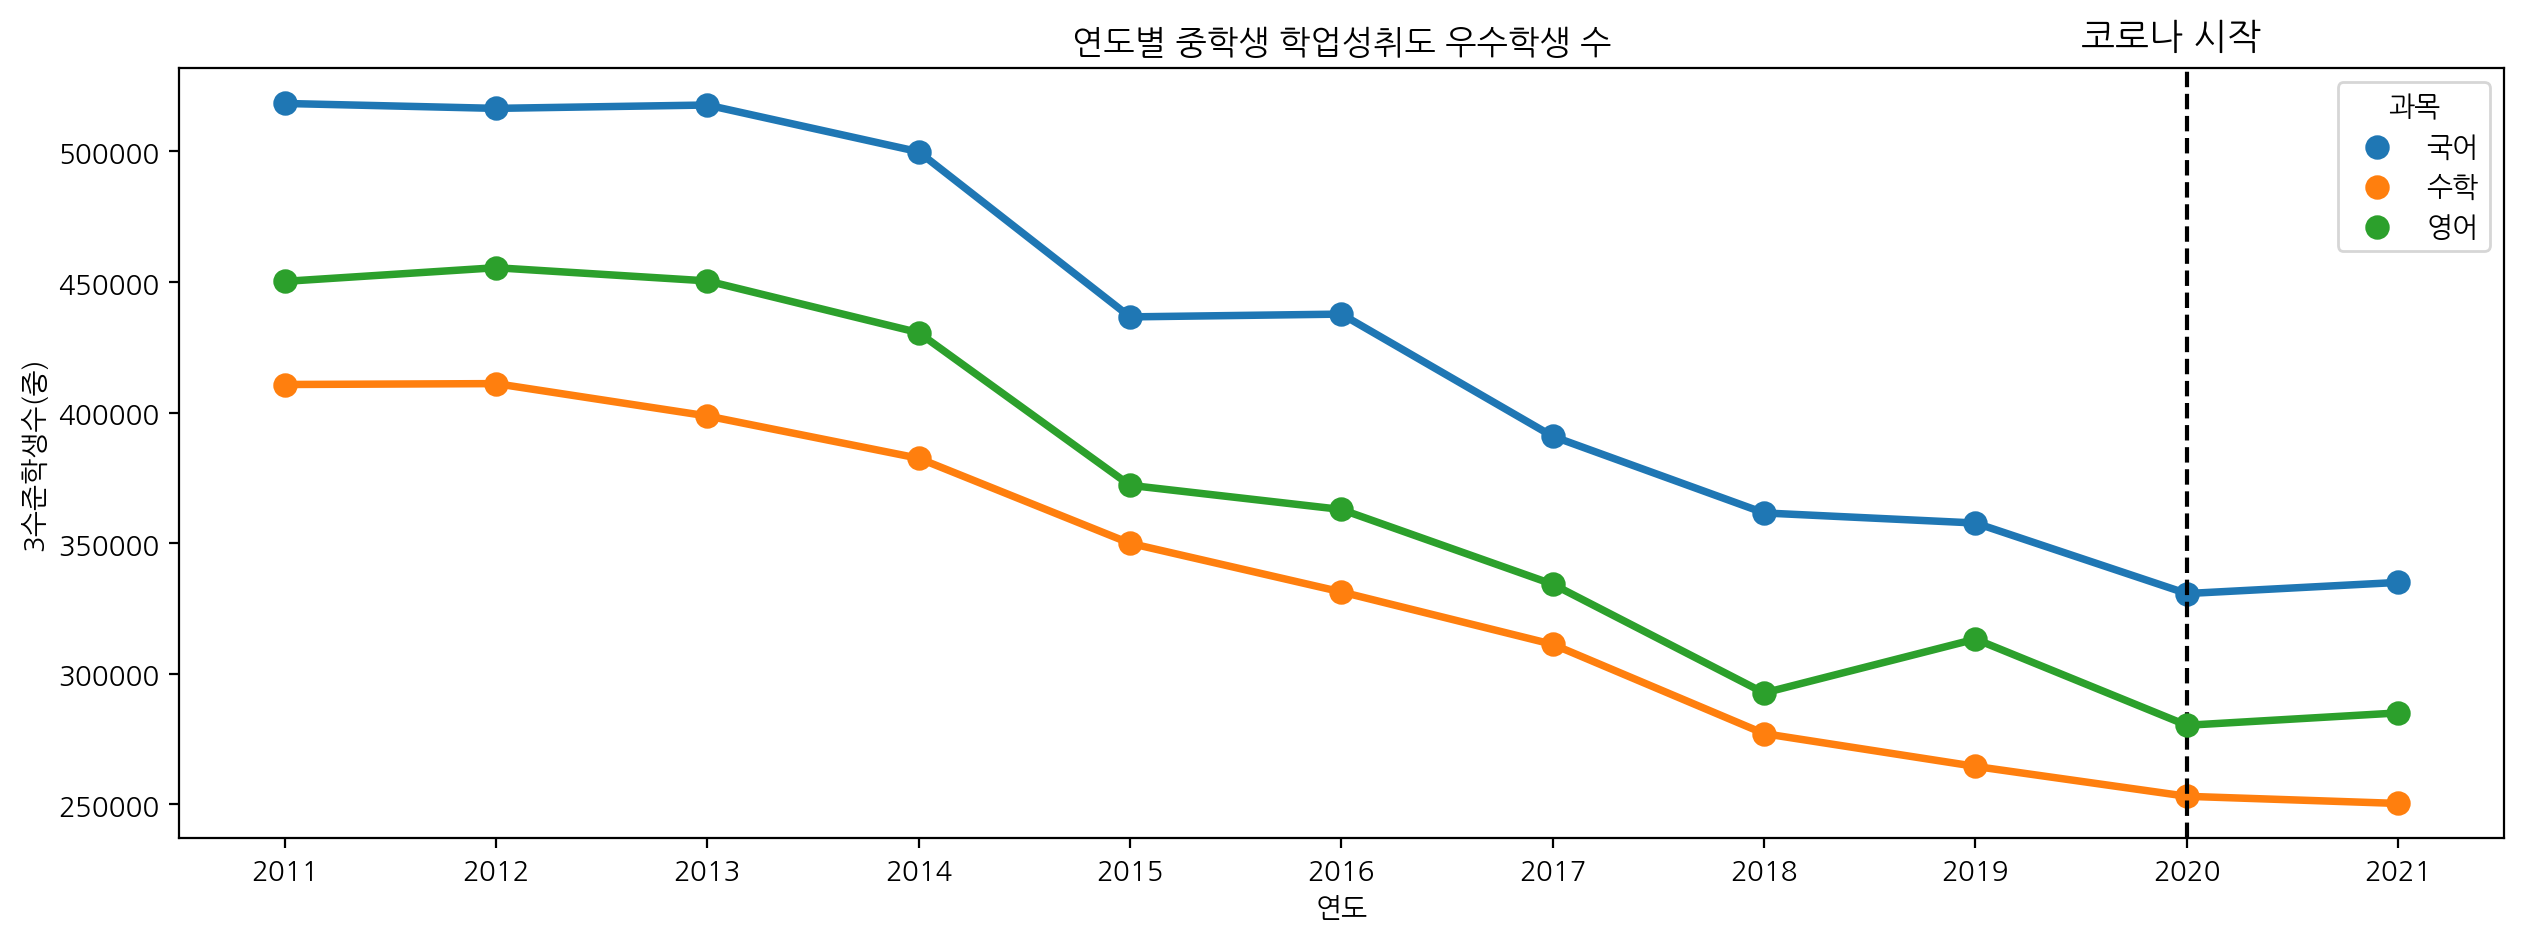

In [48]:
plt.figure(figsize=(15,5))
sns.pointplot(data=df_agg, x="연도", y="3수준학생수(중)", hue="과목")
plt.title("연도별 중학생 학업성취도 우수학생 수")
plt.axvline(9, color="black", linestyle="--")
plt.text(8.5, 540000, "코로나 시작", size=13)
plt.show()

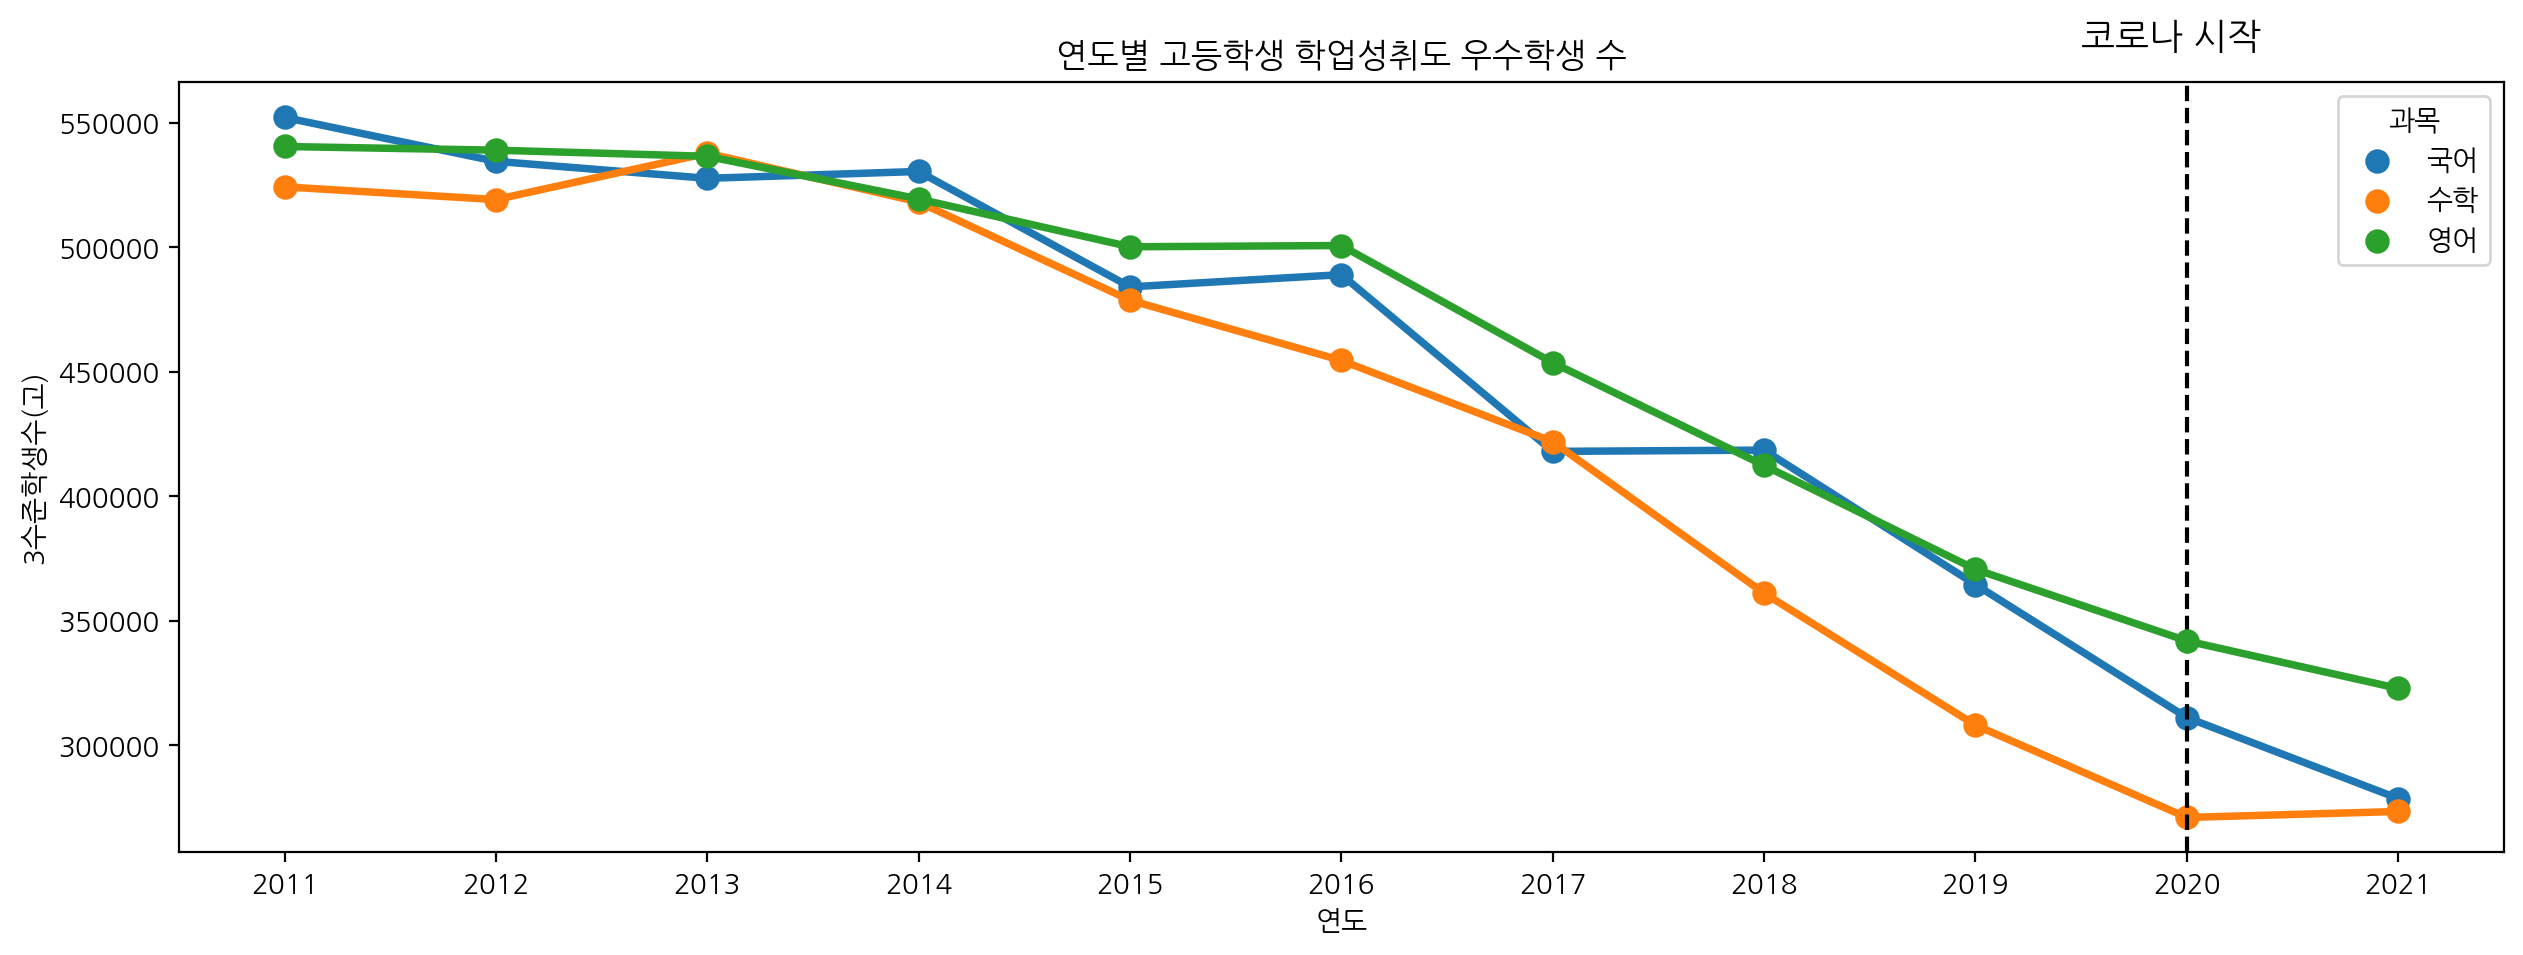

In [49]:
plt.figure(figsize=(15,5))
sns.pointplot(data=df_agg, x="연도", y="3수준학생수(고)", hue="과목")
plt.title("연도별 고등학생 학업성취도 우수학생 수")
plt.axvline(9, color="black", linestyle="--")
plt.text(8.5, 580000, "코로나 시작", size=13)
plt.show()

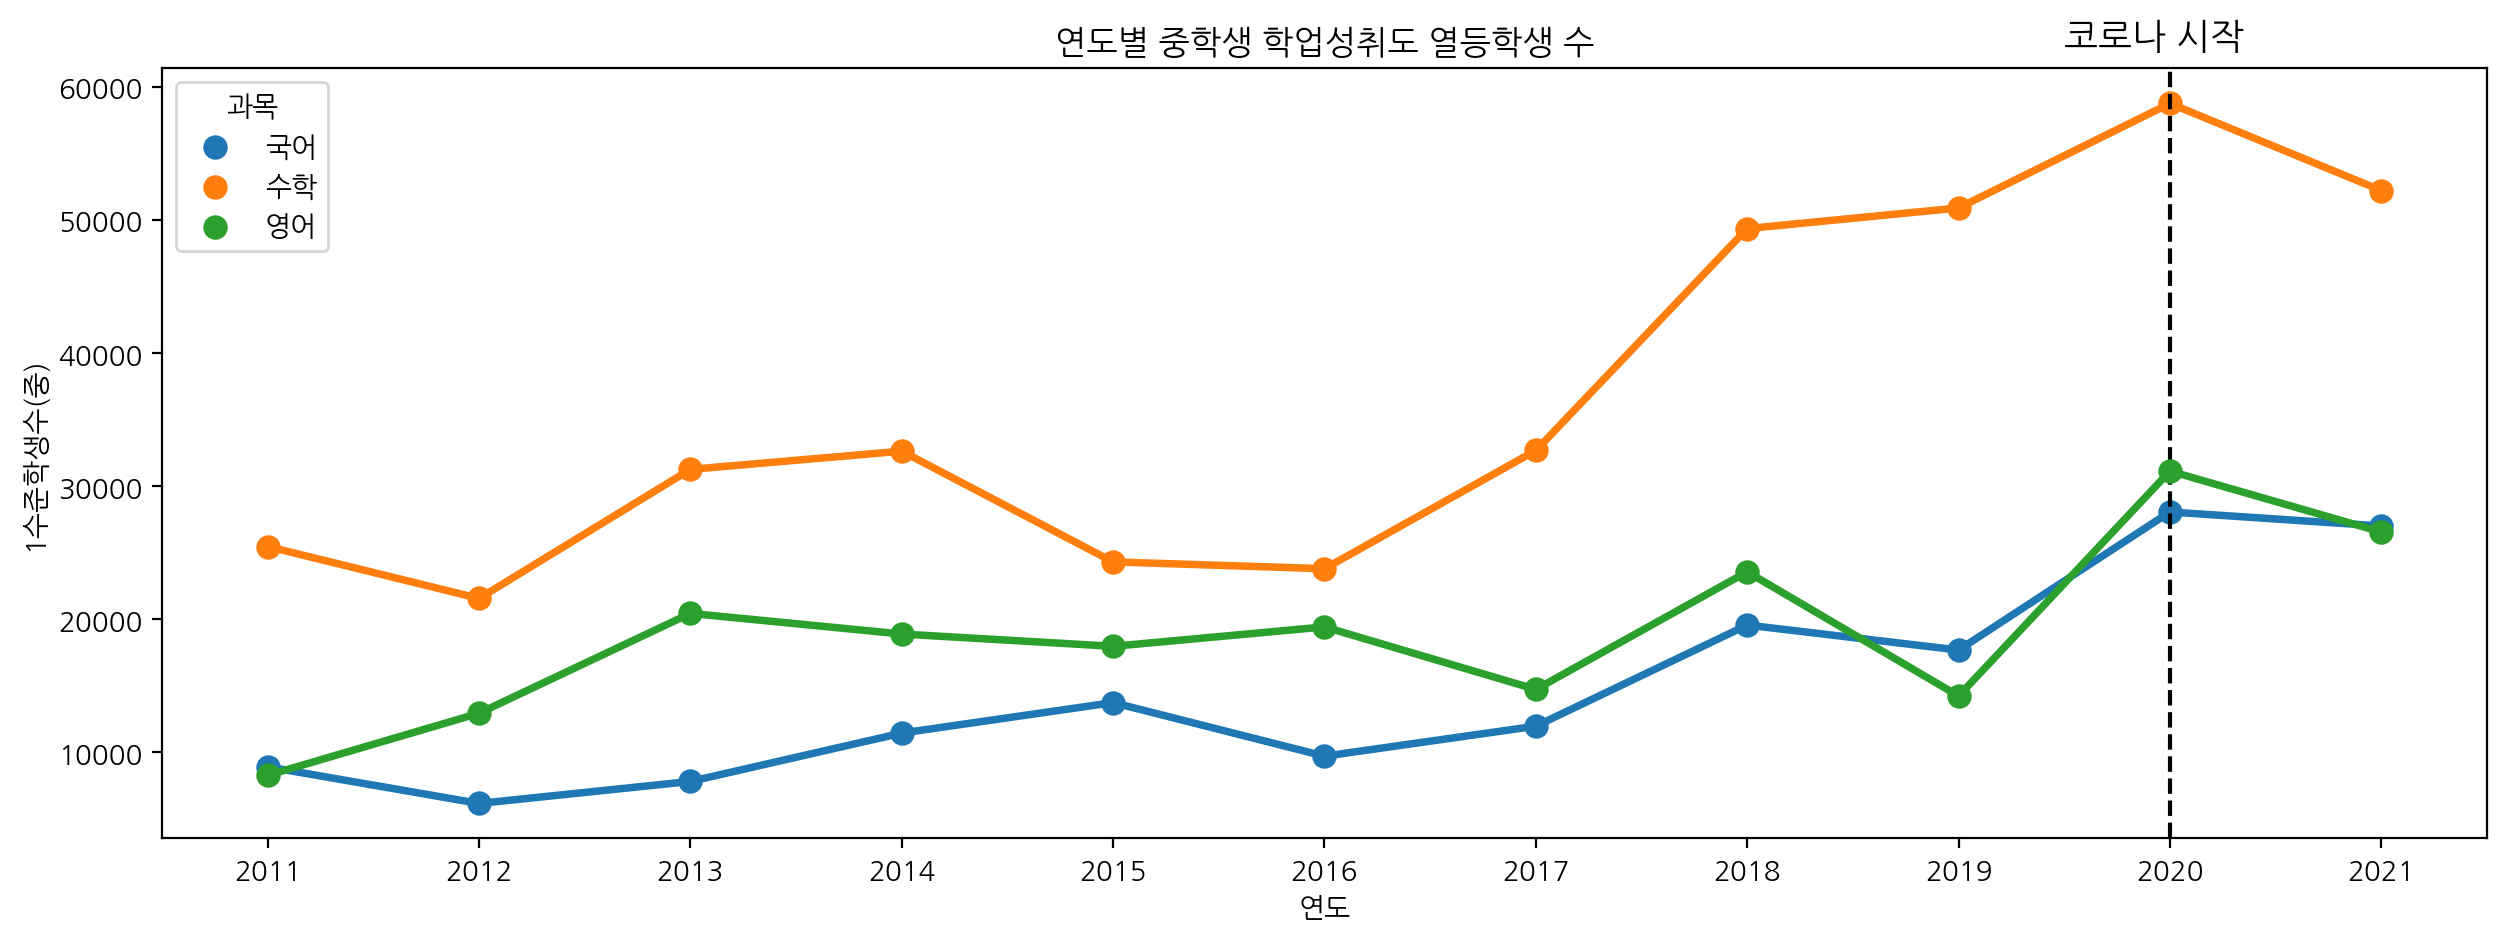

In [50]:
plt.figure(figsize=(15,5))
sns.pointplot(data=df_agg, x="연도", y="1수준학생수(중)", hue="과목")
plt.title("연도별 중학생 학업성취도 열등학생 수")
plt.axvline(9, color="black", linestyle="--")
plt.text(8.5, 63000, "코로나 시작", size=13)
plt.show()

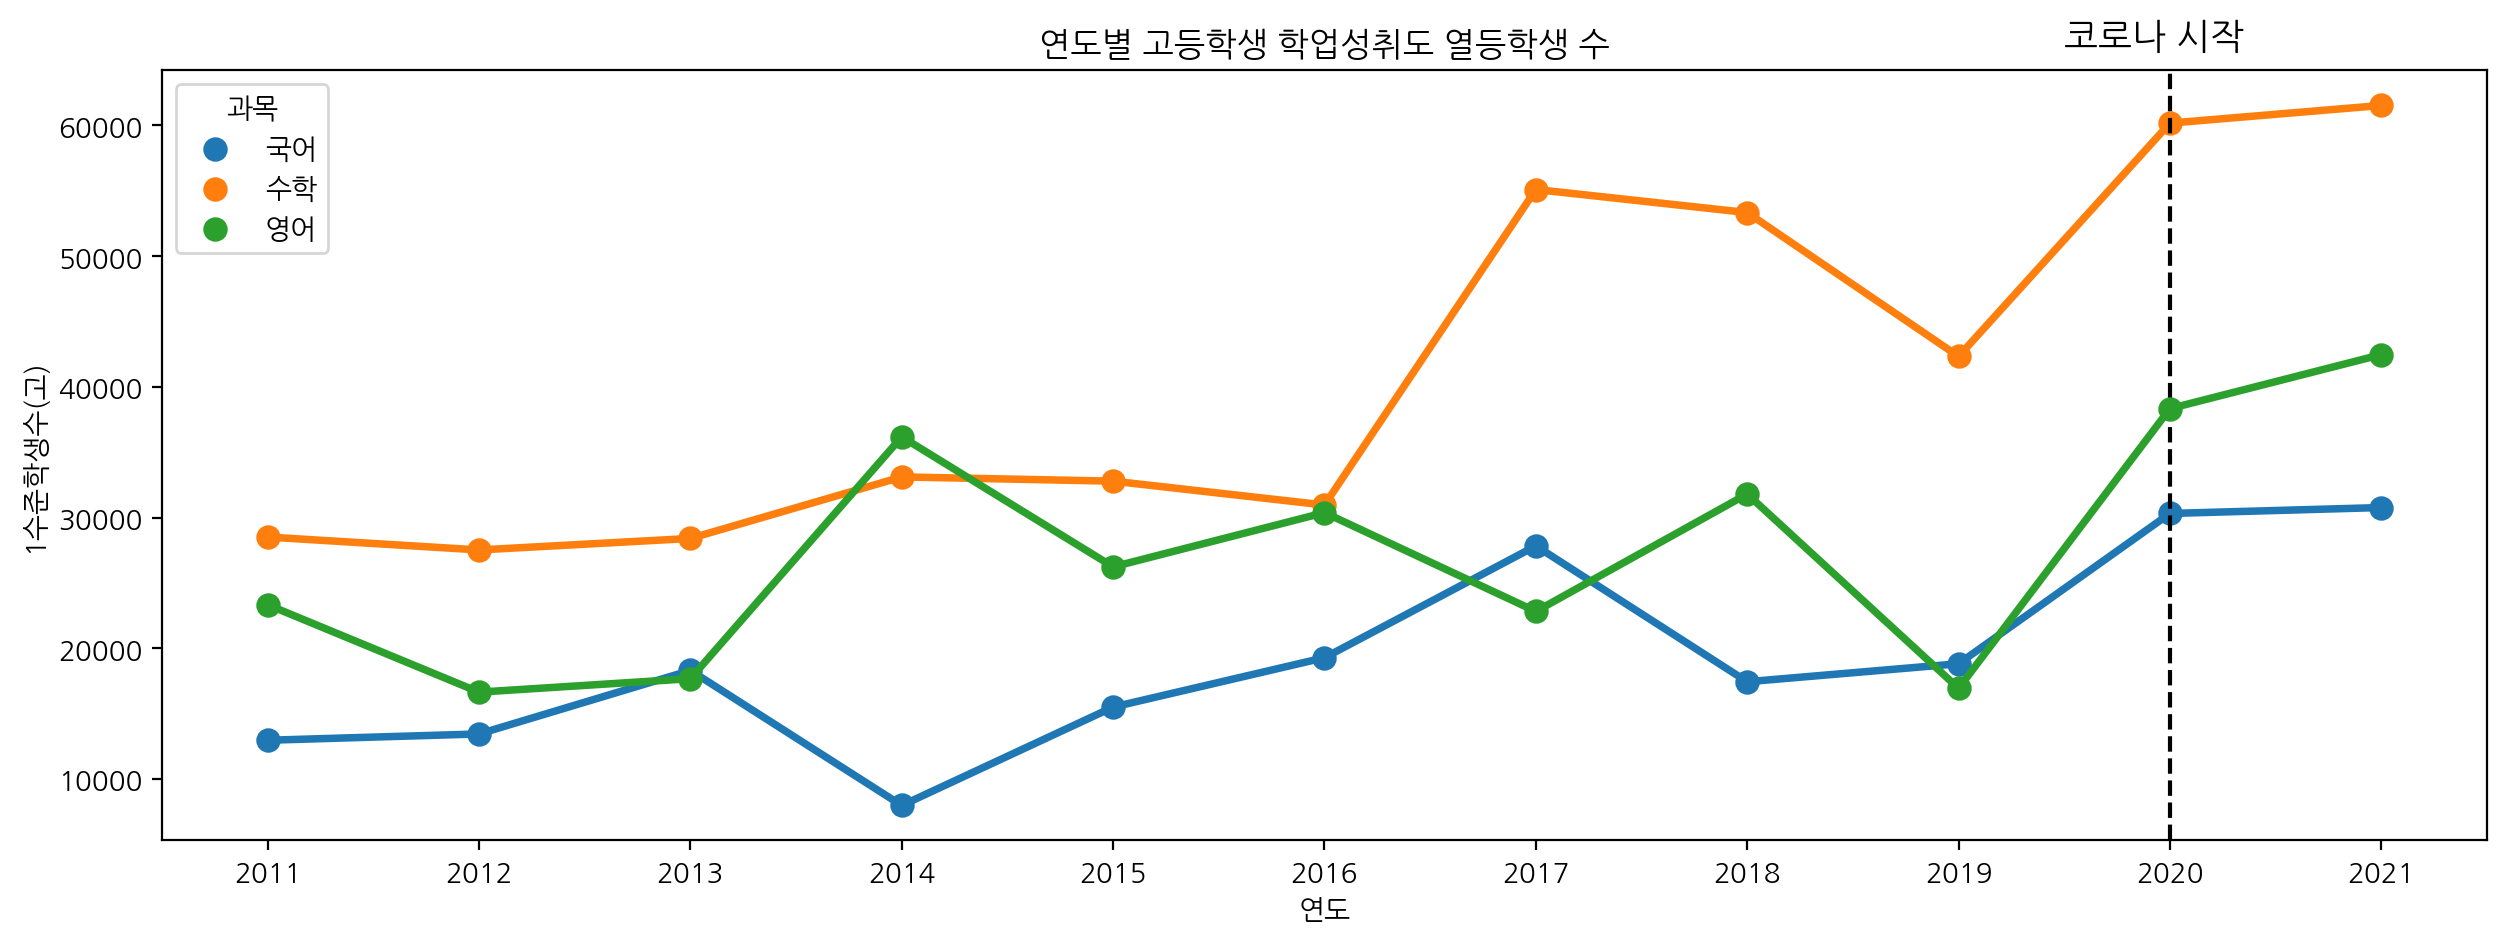

In [51]:
plt.figure(figsize=(15,5))
sns.pointplot(data=df_agg, x="연도", y="1수준학생수(고)", hue="과목")
plt.title("연도별 고등학생 학업성취도 열등학생 수")
plt.axvline(9, color="black", linestyle="--")
plt.text(8.5, 66000, "코로나 시작", size=13)
plt.show()

- 중학생 학업성취도 우수학생 수는 코로나 이전 계속해서 하락세를 보이다가 코로나 이후 오히려 반등하거나 하락폭이 줄은 모습
- 고등학생 학업성취도 우수학생 수는 국어, 영어과목에서 코로나와 관계없이 계속해서 하락세를 보이나, 수학의 경우 오히려 조금 반등함
- 그렇다면 열등학생 수는 어떨까?
- 중학생 학업성취도 열등학생 수는 우상향하는 추세를 보이다가, 코로나 이후 상승세가 꺾인 모습임
- 고등학생 학업성취도 열등학생 수도 마찬가지
- 학생 수가 줄고있다는 것을 고려해봤을 때, 온라인 교육은 학업성취도에 오히려 좋은 영향을 미치지 않았을까?

In [52]:
# 국어, 영어, 수학 학생을 하나로 합쳐 평균처리
# 연도별 학업성취도별 학생 수 집계
df_agg_mean = df_agg.groupby("연도").mean().round()
df_agg_mean

,3수준학생수(중),2수준학생수(중),1수준학생수(중),3수준학생수(고),2수준학생수(고),1수준학생수(고)
연도,,,,,,
2011,459811.0,162823.0,14223.0,538864.0,87471.0,21598.0
2012,461041.0,141764.0,13560.0,530797.0,90031.0,19201.0
2013,455658.0,125892.0,19846.0,533911.0,75732.0,21458.0
2014,437686.0,113955.0,20997.0,522586.0,64787.0,25751.0
2015,386267.0,123704.0,18679.0,487601.0,83651.0,24837.0
2016,377328.0,90850.0,17652.0,481341.0,75940.0,26871.0
2017,345487.0,95159.0,19799.0,431153.0,90164.0,35249.0
2018,310444.0,103482.0,30837.0,397295.0,81374.0,34190.0
2019,311845.0,92058.0,27617.0,347739.0,96577.0,26026.0


## 최종 merge : 사교육비 총액 + 학원 및 보습교육 항목의 소비자물가지수 + 학업중단자수 + 학업성취도별 학생 수

In [53]:
# object로 타입을 변환했음에도 실제로 적용되지 않는 오류 발생.
# dtype은 변경되나 실제 값은 변경이 안된것같음
# 오류를 해결하지 못해 연도값을 숫자형으로 통일시켜 merge해줌
df_pcs["연도"] = pd.to_numeric(df_pcs["연도"])

In [54]:
# 최종 merge 후 필요없는 컬럼 제거 및 컬럼 이름 변경
# merge를 위해 숫자형으로 바꿔놨던 연도를 다시 object형으로 변경
# 이 때 마찬가지로 dtype은 변경되나 실제 값은 변경이 안되는 오류 발생
df_merge_all = df_pcs.merge(df_agg_mean, on="연도")
df_merge_all = df_merge_all.drop(["지수", "전년대비증감률"], axis=1)
df_merge_all = df_merge_all.rename(columns={"전년대비증감" : "전년대비증감(지수)", "총액" : "사교육비총액"})
df_merge_all["연도"] = df_merge_all["연도"].astype("object")

In [55]:
# 최종 merge 데이터
df_merge_all

,연도,사교육비총액,전년대비증감(지수),학업중단자수(초),학업중단자수(중),학업중단자수(고),학업중단자수(합),3수준학생수(중),2수준학생수(중),1수준학생수(중),3수준학생수(고),2수준학생수(고),1수준학생수(고)
0,2011,248908.0,2.574,6425.0,4653.0,6846.0,17924.0,459811.0,162823.0,14223.0,538864.0,87471.0,21598.0
1,2012,239477.0,3.558,5671.0,4028.0,6427.0,16126.0,461041.0,141764.0,13560.0,530797.0,90031.0,19201.0
2,2013,235005.0,3.135,4948.0,3561.0,5625.0,14134.0,455658.0,125892.0,19846.0,533911.0,75732.0,21458.0
3,2014,231054.0,1.931,4696.0,2981.0,4707.0,12384.0,437686.0,113955.0,20997.0,522586.0,64787.0,25751.0
4,2015,227058.0,1.850,4437.0,2532.0,4175.0,11144.0,386267.0,123704.0,18679.0,487601.0,83651.0,24837.0
5,2016,233238.0,2.050,4412.0,2228.0,4310.0,10950.0,377328.0,90850.0,17652.0,481341.0,75940.0,26871.0
6,2017,241513.0,1.455,4686.0,2329.0,4531.0,11546.0,345487.0,95159.0,19799.0,431153.0,90164.0,35249.0
7,2018,252031.0,1.872,4792.0,2423.0,4622.0,11837.0,310444.0,103482.0,30837.0,397295.0,81374.0,34190.0
8,2019,269353.0,1.893,5154.0,2414.0,4318.0,11886.0,311845.0,92058.0,27617.0,347739.0,96577.0,26026.0
9,2020,254267.0,1.495,2700.0,1397.0,2321.0,6418.0,288024.0,111262.0,39329.0,308028.0,94800.0,42942.0


## 상관관계 시각화

In [56]:
corr_stop_grade_m = df_merge_all.loc[:, df_merge_all.columns.str.contains("\(\중\)", regex=True)].corr()
mask = np.triu(np.ones_like(corr_stop_grade_m))

Text(0.5, 1.0, '학업중단자수와 학업성취도와의 상관관계 - 중학교')

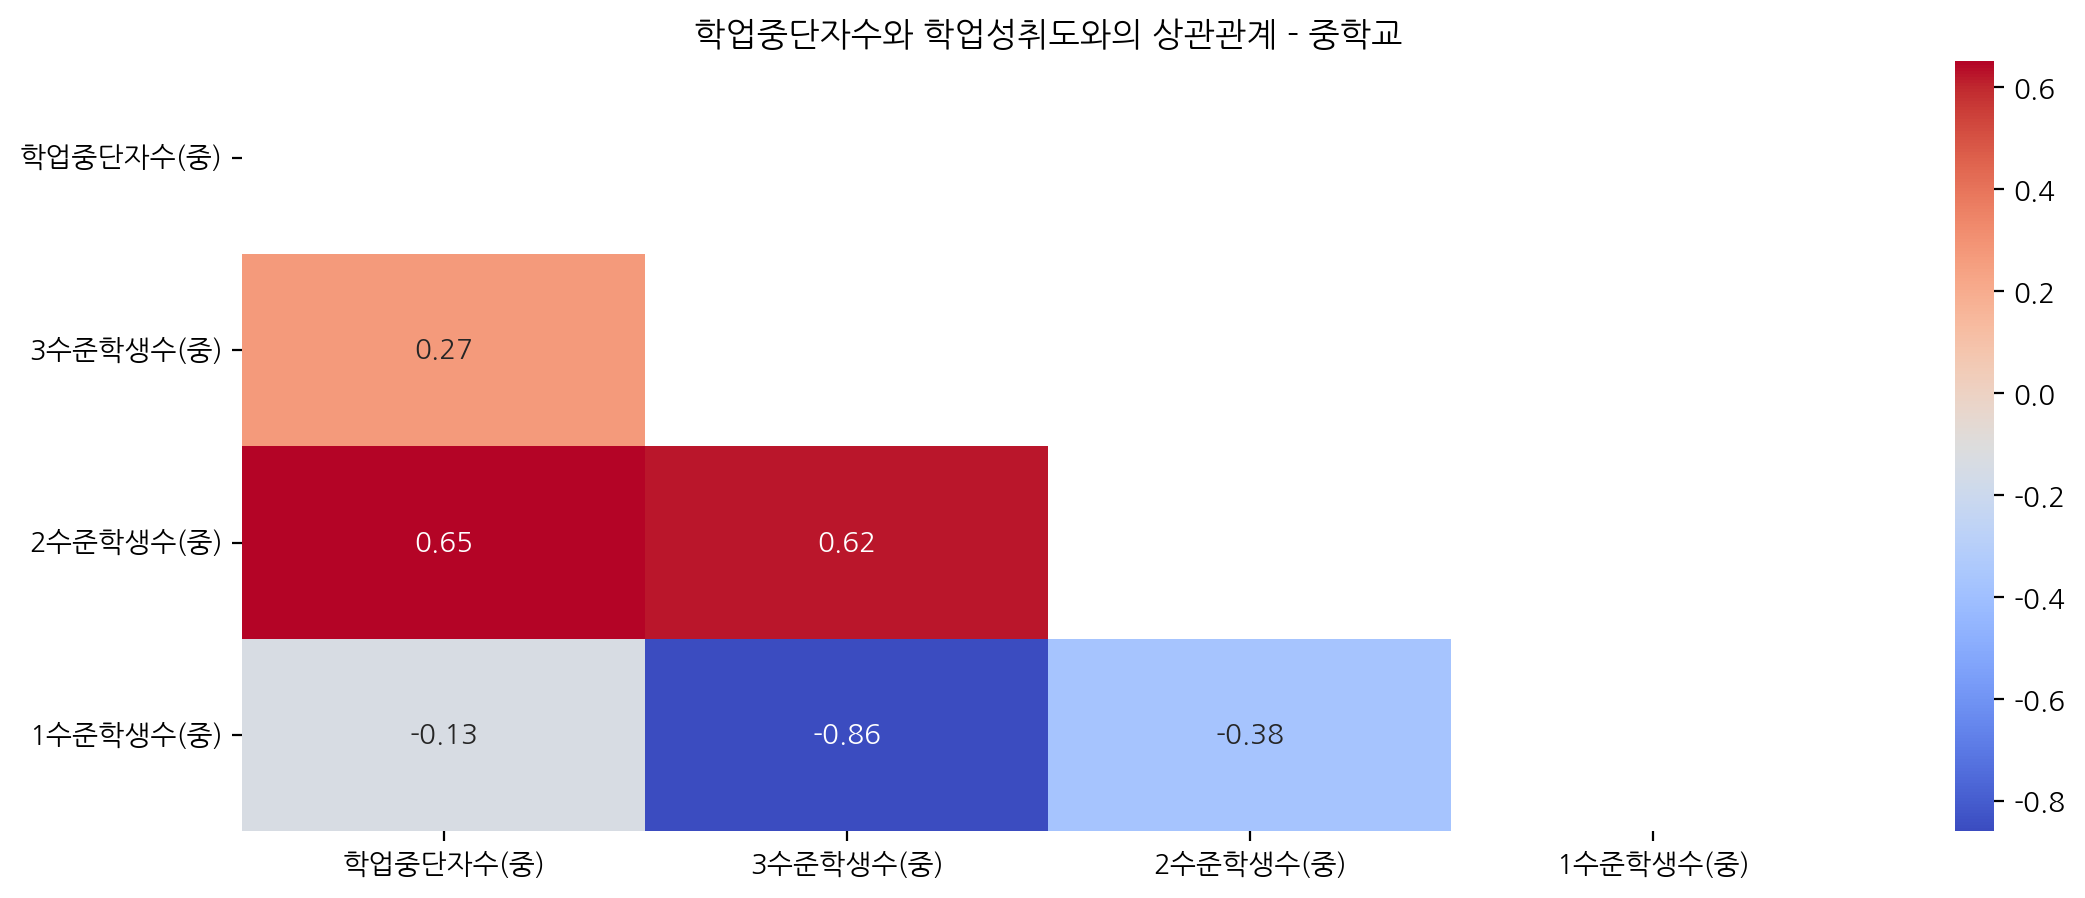

In [57]:
plt.figure(figsize=(13,5))
sns.heatmap(corr_stop_grade_m, annot=True, cmap="coolwarm", mask=mask)
plt.title("학업중단자수와 학업성취도와의 상관관계 - 중학교")

In [58]:
corr_stop_grade_h = df_merge_all.loc[:, df_merge_all.columns.str.contains("\(\고\)", regex=True)].corr()
mask = np.triu(np.ones_like(corr_stop_grade_h))

Text(0.5, 1.0, '학업중단자수와 학업성취도와의 상관관계 - 고등학교')

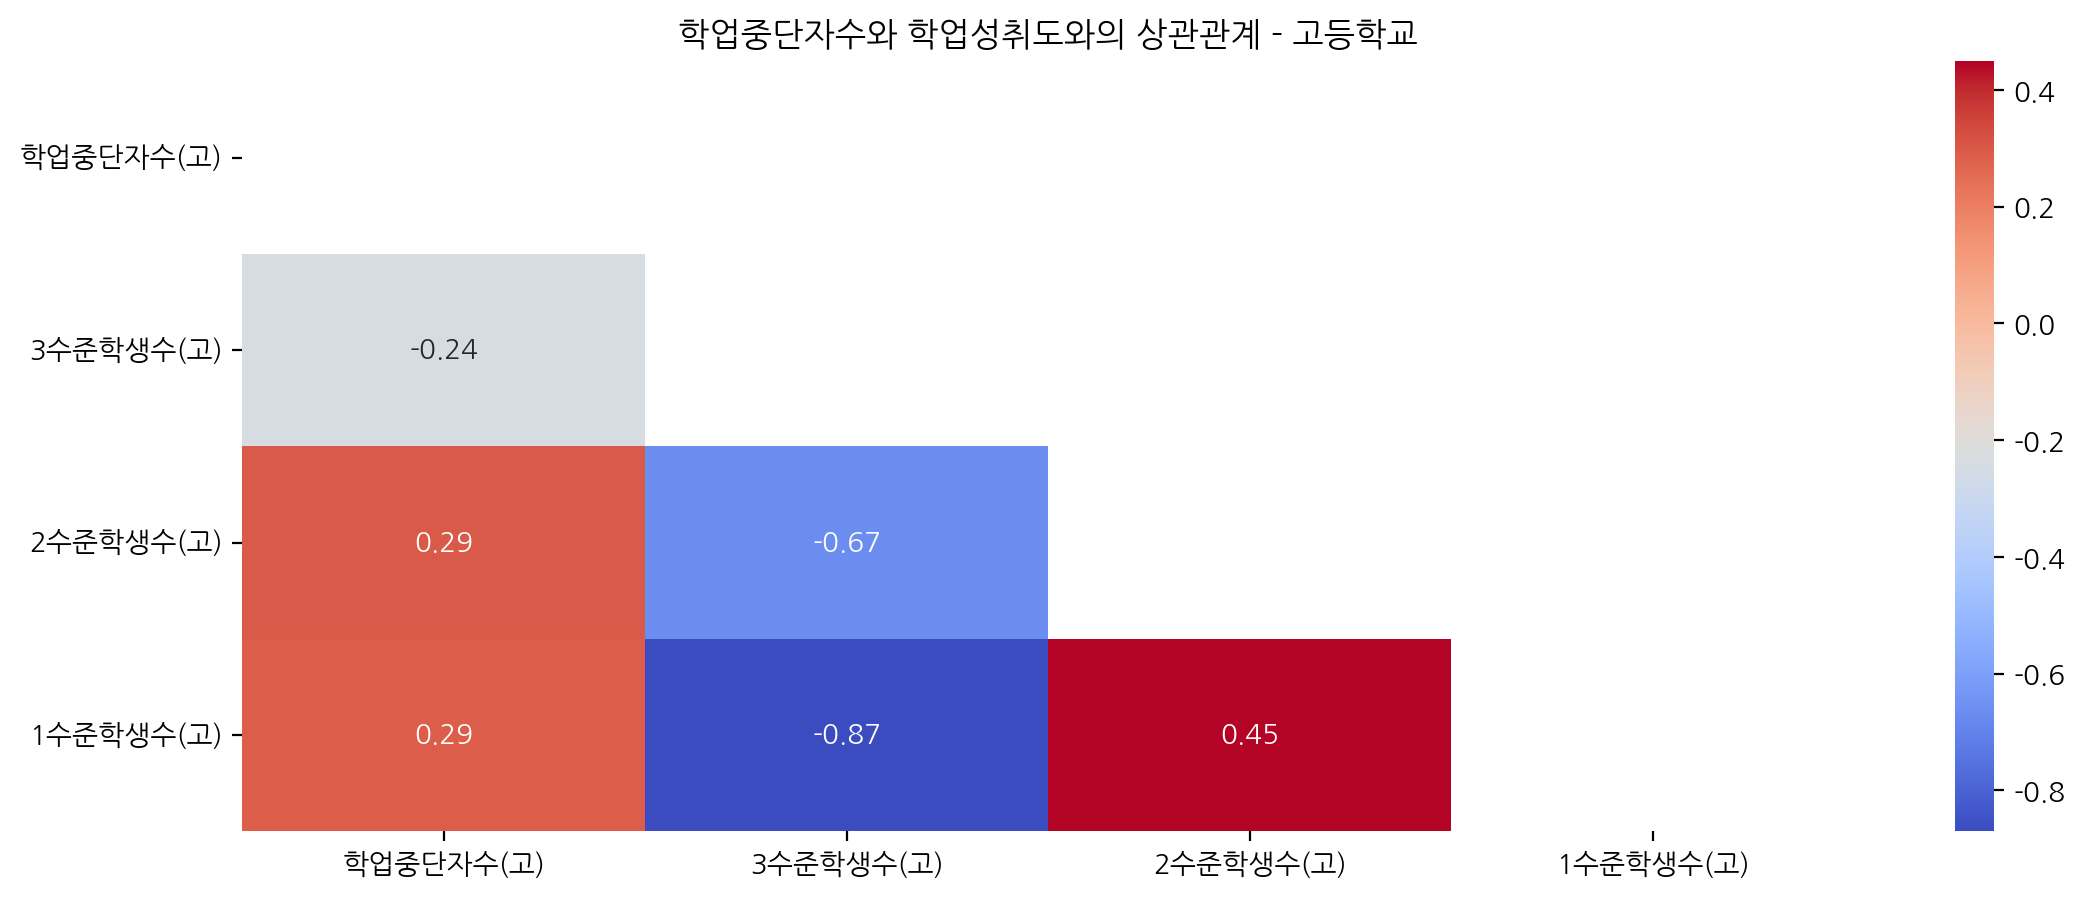

In [59]:
plt.figure(figsize=(13,5))
sns.heatmap(corr_stop_grade_h, annot=True, cmap="coolwarm", mask=mask)
plt.title("학업중단자수와 학업성취도와의 상관관계 - 고등학교")

In [60]:
corr = df_merge_all.loc[:, ~df_merge_all.columns.str.contains("\(\합\)", regex=True)].corr()
mask = np.triu(np.ones_like(corr))

Text(0.5, 1.0, '각 피처별 상관계수')

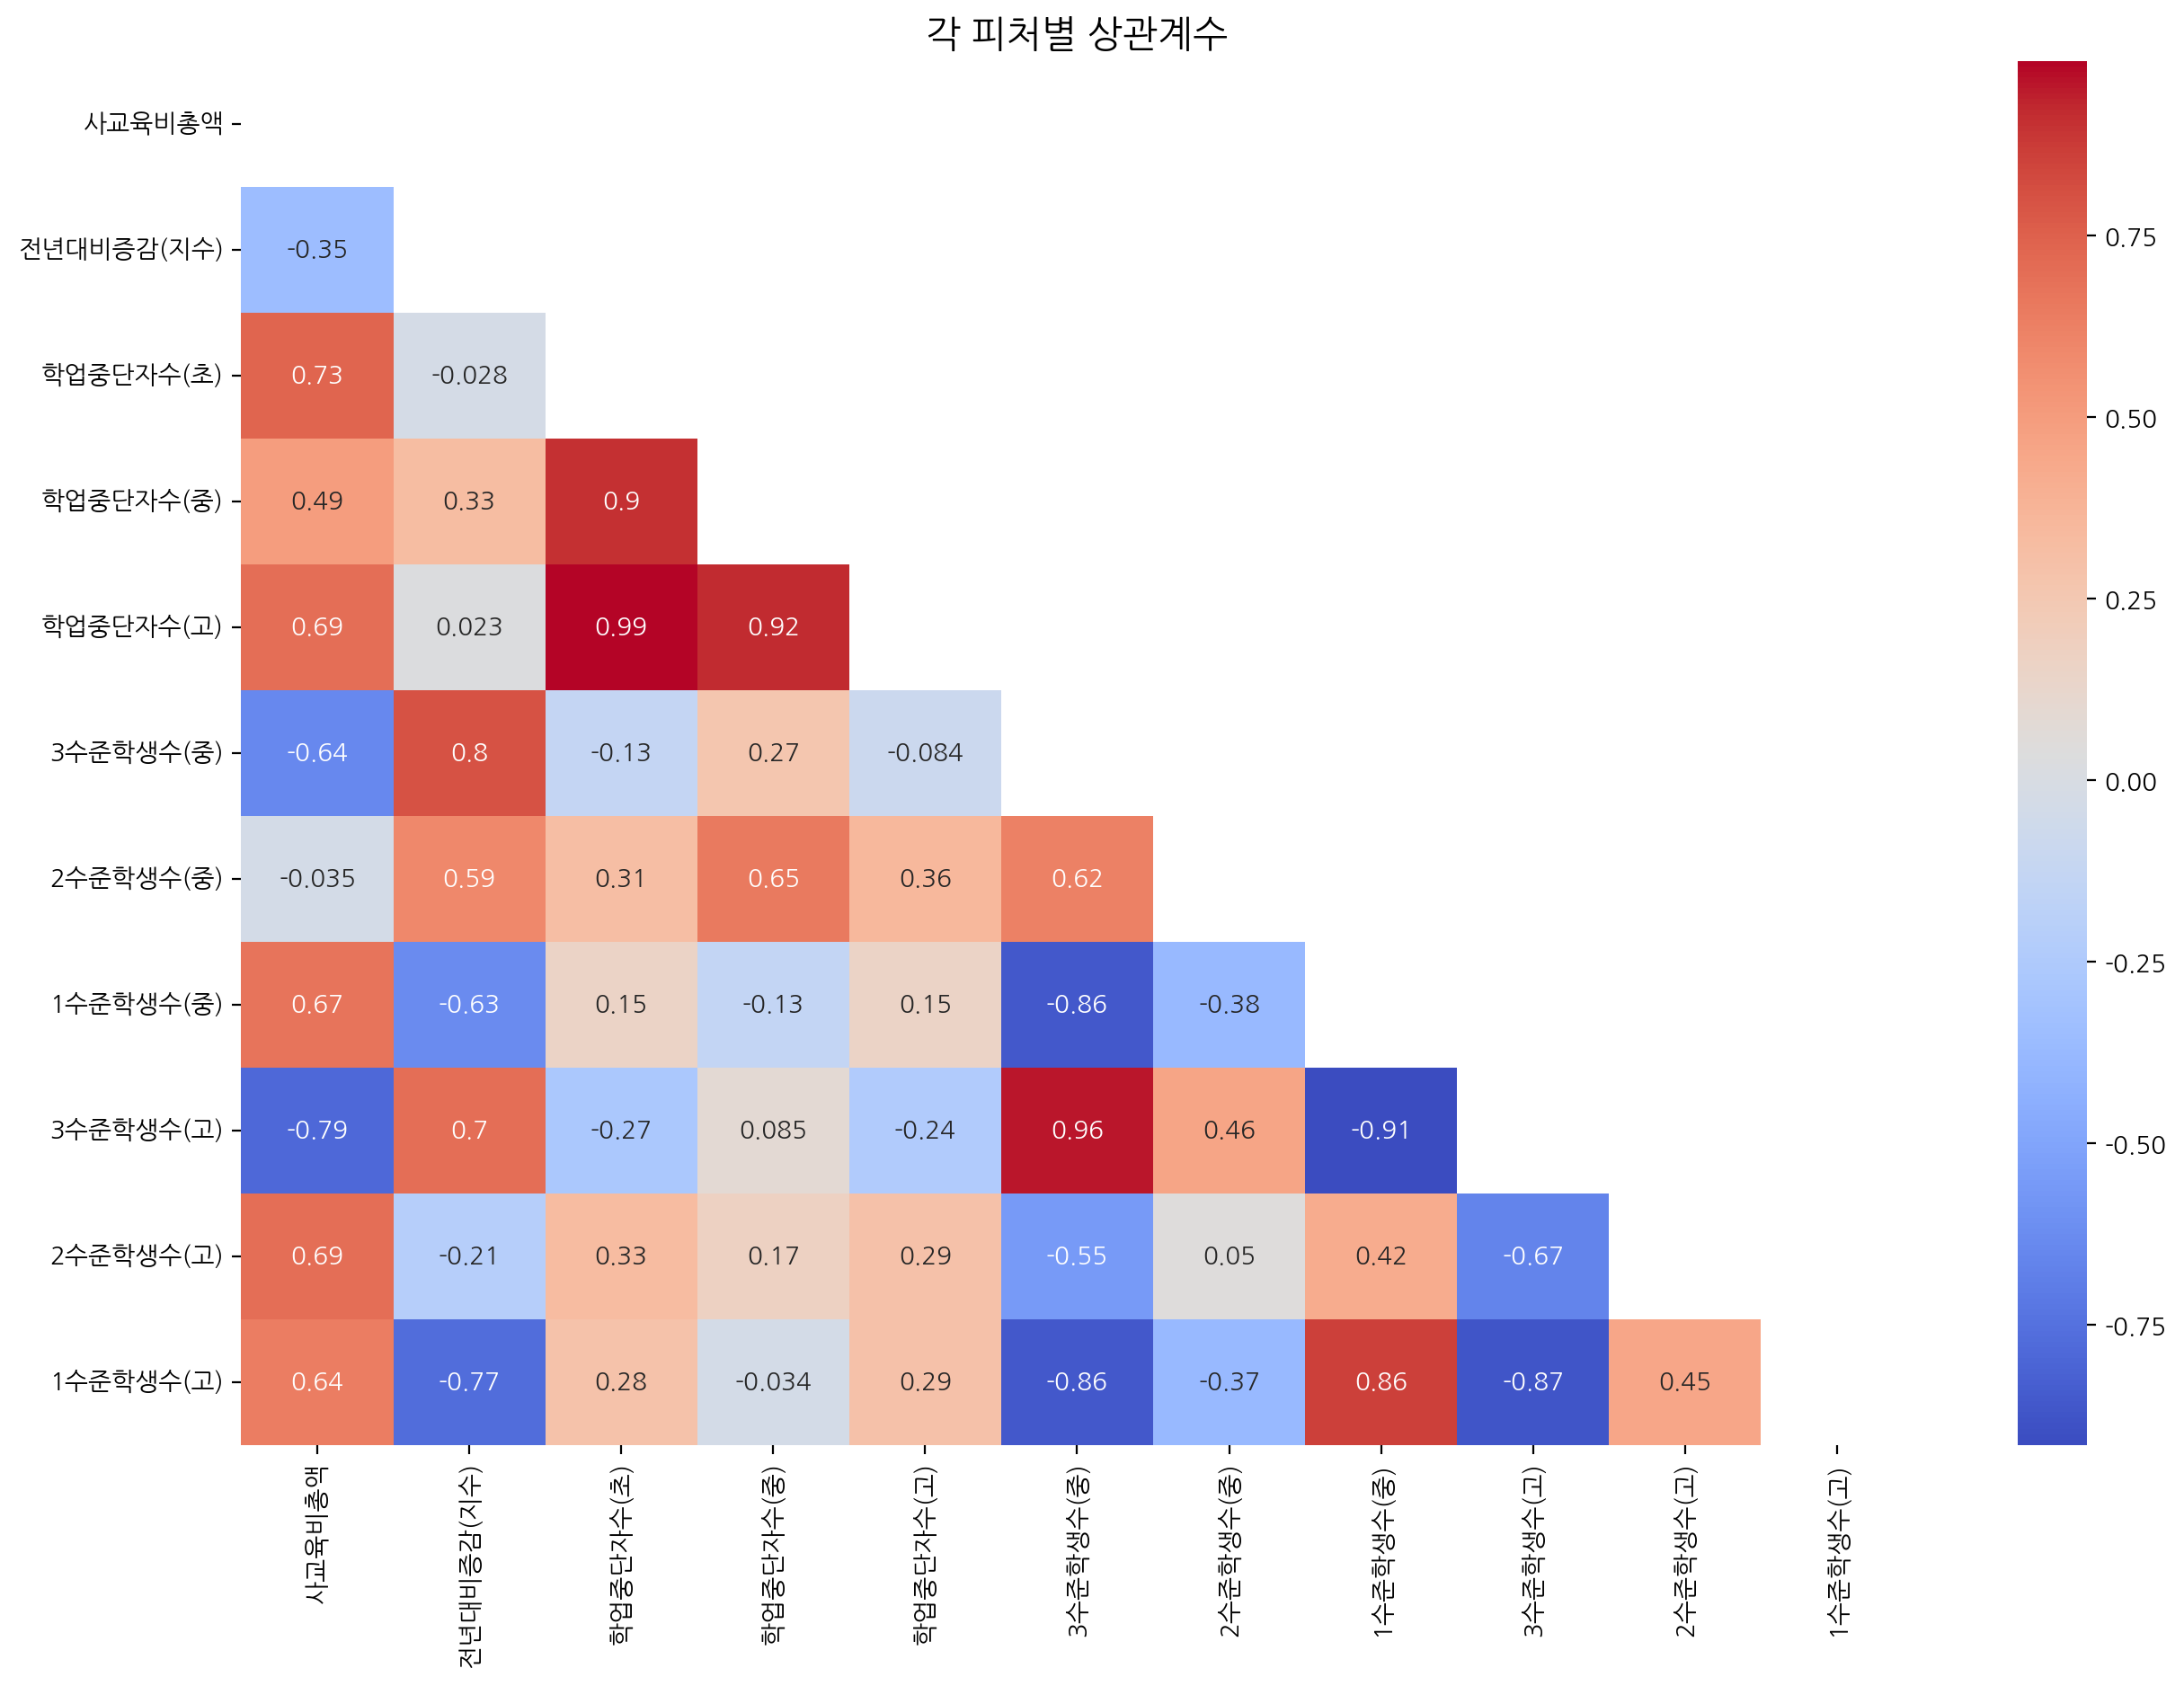

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", mask=mask)
plt.title("각 피처별 상관계수", size=15)

- 학원 및 보습교육 물가지수와 3수준학생(학업성취도 우수학생)수는 강한 양의 상관관계를 가진다.
- 반대로, 학원 및 보습교육 물가지수와 1수준학생(학업성취도 열등학생)수는 강한 음의 상관관계를 가진다.
- 사교육비 총액이 올라갈수록 학업성취도 우수학생수는 떨어진다..
- 중학교 학업중단자수가 많아질수록 중학교 학업성취도가 약간 올라간다 (학업에 관심없는 아이들이 일찌감치 자퇴하기 때문에..?)
- 반면, 고등학교 학업중단자수가 많아질수록 고등학교 학업성취도가 내려간다. (올라갈 줄 알았는데.. 왜?)

## 연도별 상관계수 시각화(year-to-year corr)

- 하고싶었으나.. 처리 방법을 잘 모르겠네요 ㅠ